<a href="https://colab.research.google.com/github/manreddyr/ml-project-stock-price-prediction/blob/main/ML_Project_Predicting_Indian_Stock_Index_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Project: Predicting Indian Stock Index Price
In this project I'll be predicting future prices of 2 popular stock indexes: Nifty50 & Bank Nifty.

![img_banner](https://imgur.com/tPByFiV.png)

## Context
For context, let's define a few key terms. An index with regards to a stock market is a way in which stocks are measured. So when we are looking at stock indexes, we are looking at how a collection of multiple stocks are being measured. Stock indexes can elude to how a stock market is performing in general, as well as how specific sectors of stocks are performing - this is based on which stocks the stock index contains.

Predicting future prices of stocks and stocks indexes is an exciting concept. If we are able to model future behaviours, we will gain great insight into how to best invest. This is notoriously difficult so I'm intrigued as to how our three different models will perform.

We'll be looking at 4 of the most popular stock indexes, some of which I personally invest in, making this project all the more interesting.

Nifty 50: This stock index features 50 of the top Indian publicly traded companies.
Bank Nifty: This stock index features 12 of the top Indian publicly traded Banking Companies.



## Project outline
An outline of the project is as follows:

* Sourcing and downloading the data
* Feature engineering
* Exploratory data analysis
* Preparing the data for all models
* Creating and fitting machine learning models:
  * Linear Regression
  * XGBoost
  * LSTM
* Conclusions
* Future work
* Sources

## Installing and importing libraries

Let's start by installing and importing the libraries that we'll use for this project.

In [ ]:
!pip install numpy==1.21 matplotlib==3.5.0 scikit-learn seaborn pandas scikit-learn plotly yfinance xgboost pandas_ta stldecompose tensorflow --quiet --upgrade

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import yfinance as yf
import math
import tensorflow as tf

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
# must run this cell twice sometimes
import pandas_ta as ta

## Downloading the data

Now let's download the data. We'll be using yfinance in order to directly pull the data from Yahoo! Finance. We'll also be creating 2 different data frames in order to best predict our future stock index prices later on.

In [ ]:
nifty50_df = yf.download('^NSEI', end="2023-05-31")
nifty50_df = sp500_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)
nifty50_df.sample(10)

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adjclose,volume,RSI_14,RSI_14_A_60,RSI_14_B_40
Date,,,,,,,,,
2020-01-27,12197.099609,12216.599609,12107.000000,12119.000000,12119.000000,441200,46.453725,0,0
2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600,51.872096,0,0
2015-10-21,8258.349609,8294.400391,8217.150391,8251.700195,8251.700195,144800,61.364260,1,0
2021-12-07,17044.099609,17251.650391,16987.750000,17176.699219,17176.699219,254100,42.504496,0,0
2009-05-12,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0,66.399384,1,0
2011-05-23,5456.700195,5456.700195,5373.000000,5386.549805,5386.549805,0,35.815780,0,1
2014-03-21,6515.200195,6522.899902,6485.700195,6493.200195,6493.200195,189900,65.482303,1,0
2012-08-10,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0,61.120350,1,0
2022-10-31,17910.199219,18022.800781,17899.900391,18012.199219,18012.199219,227200,66.458212,1,0


In [ ]:
banknifty_df = yf.download('^NSEBANK', start="1992-01-03", end="2023-03-30")
banknifty_df = banknifty_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)
banknifty_df.sample(10)

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adjclose,volume
Date,,,,,,
2014-11-19,17739.199219,17745.699219,17557.099609,17585.650391,17585.445312,19800
2015-01-02,18752.199219,19118.849609,18752.199219,19057.800781,19057.580078,0
2017-11-06,25569.000000,25694.599609,25529.500000,25571.150391,25570.853516,0
2015-01-06,18874.599609,18874.599609,18388.349609,18430.750000,18430.535156,0
2013-12-02,11180.299805,11347.450195,11180.299805,11284.349609,11284.218750,25900
2015-10-09,17640.400391,17749.550781,17498.449219,17590.250000,17590.044922,0
2008-12-04,4224.950195,4460.750000,4224.950195,4446.649902,4446.598145,0
2022-04-20,36482.601562,36513.851562,36114.050781,36314.898438,36314.476562,153400
2014-06-17,14982.349609,15393.750000,14933.250000,15373.200195,15373.021484,36300


## Feature engineering

### Split dates

Now we'll create a function in order to split the date column into other date related features.

In [ ]:
def split_date(df):
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

In [ ]:
split_date(nifty50_df)
split_date(banknifty_df)

### Close - open daily change

Now we'll calculate the difference between close and opening price of each day. This should capture the daily volatility of the stock index prices.

We'll create a function to apply to each data set.

In [ ]:
def open_close(df):
  df['openclose'] = df['close'].values - df['open'].values

  return df

In [ ]:
open_close(nifty50_df)
open_close(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,dayofyear,dayofmonth,weekofyear,openclose
Date,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,260,17,38,-0.899902
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,261,18,38,138.500000
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,262,19,38,290.850098
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,263,20,38,-14.800293
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,264,21,38,86.200195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,82,23,12,-219.250000
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,83,24,12,-159.898438
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,86,27,13,-53.398438


### Stock features

Now we're going to engineer a few investing specific features that we'll use as features when modeling. 

#### SMA

The first few features we'll create are simple moving averages, SMA, for 50, 100, 200 days. 

Simple moving average is an analysis tool commonly used when analysing investments that essentially removes outliers and smoothes out data by taking the last n-many (n=50, 100, and 200 in our case) closing prices and calculating the average price of all the days within the specified time period.

We'll create a function in order to calculate the SMA for each of our data sets.

In [ ]:
def SMA(df):
    df['sma50'] = df['close'].rolling(50).mean().shift()
    df['sma100'] = df['close'].rolling(100).mean().shift()
    df['sma200'] = df['close'].rolling(200).mean().shift()

    return df

In [ ]:
SMA(nifty50_df)
SMA(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,dayofyear,dayofmonth,weekofyear,openclose,sma50,sma100,sma200
Date,,,,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,260,17,38,-0.899902,NaN,NaN,NaN
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,261,18,38,138.500000,NaN,NaN,NaN
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,262,19,38,290.850098,NaN,NaN,NaN
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,263,20,38,-14.800293,NaN,NaN,NaN
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,264,21,38,86.200195,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,82,23,12,-219.250000,41029.846016,41847.204023,39659.007705
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,83,24,12,-159.898438,40981.888984,41833.464492,39680.716943
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,86,27,13,-53.398438,40925.142031,41814.339023,39701.142705


#### EMA

Now we'll engineer the exponential moving average, EMA, of our data sets.

EMA is very similar to SMA, the only difference is that a higher weight is assigned to more recent times when calculating the average. For example, over a period of time, the most recent days will be given a heavier weight when calculating the average.

We'll calculate an EMA for 50, 100, and 200 days by creating a function to apply to each of our data sets.

In [ ]:
def EMA(df):
    df['ema50'] = df['close'].ewm(span=50).mean().shift()
    df['ema100'] = df['close'].ewm(span=100).mean().shift()
    df['ema200'] = df['close'].ewm(span=200).mean().shift()

    return df

In [ ]:
EMA(nifty50_df)
EMA(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,dayofyear,dayofmonth,weekofyear,openclose,sma50,sma100,sma200,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,260,17,38,-0.899902,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,261,18,38,138.500000,NaN,NaN,NaN,6897.100098,6897.100098,6897.100098
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,262,19,38,290.850098,NaN,NaN,NaN,6980.000498,6979.187749,6978.781375
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,263,20,38,-14.800293,NaN,NaN,NaN,7126.278435,7122.902246,7121.216850
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,264,21,38,86.200195,NaN,NaN,NaN,7196.256072,7191.731745,7189.461957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,82,23,12,-219.250000,41029.846016,41847.204023,39659.007705,40841.208216,40925.729526,40014.914664
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,83,24,12,-159.898438,40981.888984,41833.464492,39680.716943,40793.196068,40899.812079,40010.954303
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,86,27,13,-53.398438,40925.142031,41814.339023,39701.142705,40738.378636,40870.020781,40004.828903


#### MACD

Now we're going to engineer the moving average convergence/ divergence, MACD, of our data sets. 

The MACD is described by 3 interconnected values: The MACD, the signal line, and the histogram, labeled MACD_12_26_9, MACDh_12_26_9, MACDs_12_26_9 respectively. The moving average convergence/divergence line is calculated by subtracting the 26 day EMA from the 12 day EMA. The signal line is a nine day EMA of the MACD line. 

The MACD can indicate good times to buy and sell a stock. To learn more about MACD, you can find an article linked in the sources section.

Again, we'll create a function to calculate the MACD of each data set.

In [ ]:
def MACD(df):
    df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
    return df

In [ ]:
MACD(nifty50_df)
MACD(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,...,openclose,sma50,sma100,sma200,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,...,-0.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,...,138.500000,NaN,NaN,NaN,6897.100098,6897.100098,6897.100098,NaN,NaN,NaN
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,...,290.850098,NaN,NaN,NaN,6980.000498,6979.187749,6978.781375,NaN,NaN,NaN
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,...,-14.800293,NaN,NaN,NaN,7126.278435,7122.902246,7121.216850,NaN,NaN,NaN
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,...,86.200195,NaN,NaN,NaN,7196.256072,7191.731745,7189.461957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,...,-219.250000,41029.846016,41847.204023,39659.007705,40841.208216,40925.729526,40014.914664,-419.136887,-5.719243,-413.417644
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,...,-159.898438,40981.888984,41833.464492,39680.716943,40793.196068,40899.812079,40010.954303,-426.687743,-10.616079,-416.071664
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,...,-53.398438,40925.142031,41814.339023,39701.142705,40738.378636,40870.020781,40004.828903,-424.873373,-7.041367,-417.832006


#### RSI

Now we're going to engineer the relative strength index, RSI.

The RSI indicates when an investment price has been "overbought" and is in need of a pricing correction when the indicator in the histogram is above 60, and indicates the opposite when the indicator is below 40. 

When the RSI is calculated, we can also include signal indicators RSI_14_A_60 and RSI_14_B_40. These indicators represent True/ False regarding the RSI going above or below the threshold (A_60 = above 60 and B_40 = below 40). To learn more about RSIs check out the souces listed at the end of the project.

We're going to create a function in order to calculate the RSI of each data set.

In [ ]:
def RSI(df):
    df.ta.rsi(close='close', append=True, signal_indicators=True, xa=60, xb=40)
    
    return df

In [ ]:
RSI(nifty50_df)
RSI(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,...,sma200,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_14_A_60,RSI_14_B_40
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,...,NaN,6897.100098,6897.100098,6897.100098,NaN,NaN,NaN,NaN,0,0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,...,NaN,6980.000498,6979.187749,6978.781375,NaN,NaN,NaN,NaN,0,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,...,NaN,7126.278435,7122.902246,7121.216850,NaN,NaN,NaN,NaN,0,0
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,...,NaN,7196.256072,7191.731745,7189.461957,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,...,39659.007705,40841.208216,40925.729526,40014.914664,-419.136887,-5.719243,-413.417644,41.900968,0,0
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,...,39680.716943,40793.196068,40899.812079,40010.954303,-426.687743,-10.616079,-416.071664,39.880851,0,1
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,...,39701.142705,40738.378636,40870.020781,40004.828903,-424.873373,-7.041367,-417.832006,40.383113,0,0


#### OBV

Now we'll engineer our final investment feature the OBV, or on balance volume.

The OBV measures the ups and downs of volume over time.

When OBV is on the rise, it indicates that buyers are willing to buy the stock and therefore push the price higher. When OBV is falling it indicates that the volume is greater than the volume being bought, meaning lower prices. 

One other interesting thing to note is that if the price of a stock is rising but OBV is falling, this could indicate that the upward price is not backed by "strong buyers" and the price could fall shortly. 

We'll create a function to calculate the obv of each of our data sets.

In [ ]:
def OBV(df):
    df["obv"] = (np.sign(df["close"].diff()) * df["volume"]).cumsum()
    
    return df

In [ ]:
OBV(nifty50_df)
OBV(banknifty_df)

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,...,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_14_A_60,RSI_14_B_40,obv
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0,0,9,2007,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0,1,9,2007,3,...,6897.100098,6897.100098,6897.100098,NaN,NaN,NaN,NaN,0,0,0.000000e+00
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0,2,9,2007,3,...,6980.000498,6979.187749,6978.781375,NaN,NaN,NaN,NaN,0,0,0.000000e+00
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0,3,9,2007,3,...,7126.278435,7122.902246,7121.216850,NaN,NaN,NaN,NaN,0,0,0.000000e+00
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0,4,9,2007,3,...,7196.256072,7191.731745,7189.461957,NaN,NaN,NaN,NaN,0,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,3,3,2023,1,...,40841.208216,40925.729526,40014.914664,-419.136887,-5.719243,-413.417644,41.900968,0,0,1.957105e+09
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,4,3,2023,1,...,40793.196068,40899.812079,40010.954303,-426.687743,-10.616079,-416.071664,39.880851,0,1,1.956939e+09
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,0,3,2023,1,...,40738.378636,40870.020781,40004.828903,-424.873373,-7.041367,-417.832006,40.383113,0,0,1.957133e+09


### Drop nans

That's it for our feature engineering so now we'll drop all of the rows that contain nan values.

In [ ]:
def drop_nans(df):
    df = df.dropna()
    
    return df

In [ ]:
nifty50_df = drop_nans(nifty50_df)
banknifty_df = drop_nans(banknifty_df)
nifty50_df_dropped_rows = nifty50_df.dropna()
banknifty_df_dropped_rows = banknifty_df.dropna()

## Exploratory data analysis

Let's start off the EDA by looking at some of the stock indexes individually.

### Nifty 50

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

In [ ]:
nifty50_df.describe()

,open,high,low,close,adjclose,volume,RSI_14,RSI_14_A_60,RSI_14_B_40,dayofweek,...,sma50,sma100,sma200,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,obv
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3.647000e+03,3647.000000,3647.000000,3647.000000,3647.000000,...,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3.647000e+03
mean,9104.063975,9154.084029,9038.937930,9097.816015,9097.816015,2.068915e+05,54.010235,0.344667,0.147244,1.991774,...,9002.787365,8915.699936,8743.271710,9003.695630,8916.483373,8745.438778,26.028285,0.389062,25.639224,1.448563e+07
std,4197.186679,4208.900757,4175.983256,4193.612510,4193.612510,2.148387e+05,12.527256,0.475325,0.354398,1.411277,...,4130.134145,4068.779029,3921.699694,4124.224910,4052.885807,3905.986961,125.941159,37.172044,118.999725,1.983151e+07
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00,12.941799,0.000000,0.000000,0.000000,...,2784.175981,2830.934487,3369.808739,2801.154877,3000.902546,3388.348332,-1005.837460,-278.297727,-848.332753,-1.910800e+06
25%,5582.125000,5621.024902,5551.825195,5575.900146,5575.900146,0.000000e+00,45.229765,0.000000,0.000000,1.000000,...,5595.096504,5566.103503,5480.547374,5586.794758,5581.496228,5510.944844,-39.114020,-19.400376,-35.611816,0.000000e+00
50%,8273.349609,8326.450195,8220.450195,8270.450195,8270.450195,1.728000e+05,54.532901,0.000000,0.000000,2.000000,...,8268.877988,8232.662539,8109.961758,8265.516821,8231.785993,8120.051144,34.254740,0.063024,33.901900,5.345800e+06
75%,11293.525391,11346.299805,11210.149902,11272.750000,11272.750000,2.807500e+05,63.256263,1.000000,0.000000,3.000000,...,11160.009033,11016.263506,10888.521890,11172.859607,11024.197738,10882.563361,90.655999,20.027474,85.992538,1.706725e+07
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06,85.598707,1.000000,1.000000,4.000000,...,18308.955977,18030.359434,17828.852510,18191.280479,17908.115998,17680.309726,425.479627,208.438997,383.876209,6.158310e+07


Here are the top 3 closing prices. Interestingly none of the top prices are in 2023.

In [ ]:
nifty50_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

,adjclose
Date,
2022-12-01,18812.500000
2022-11-30,18758.349609
2022-12-05,18701.050781


Now we'll look at the Nifty 50 performance over time.

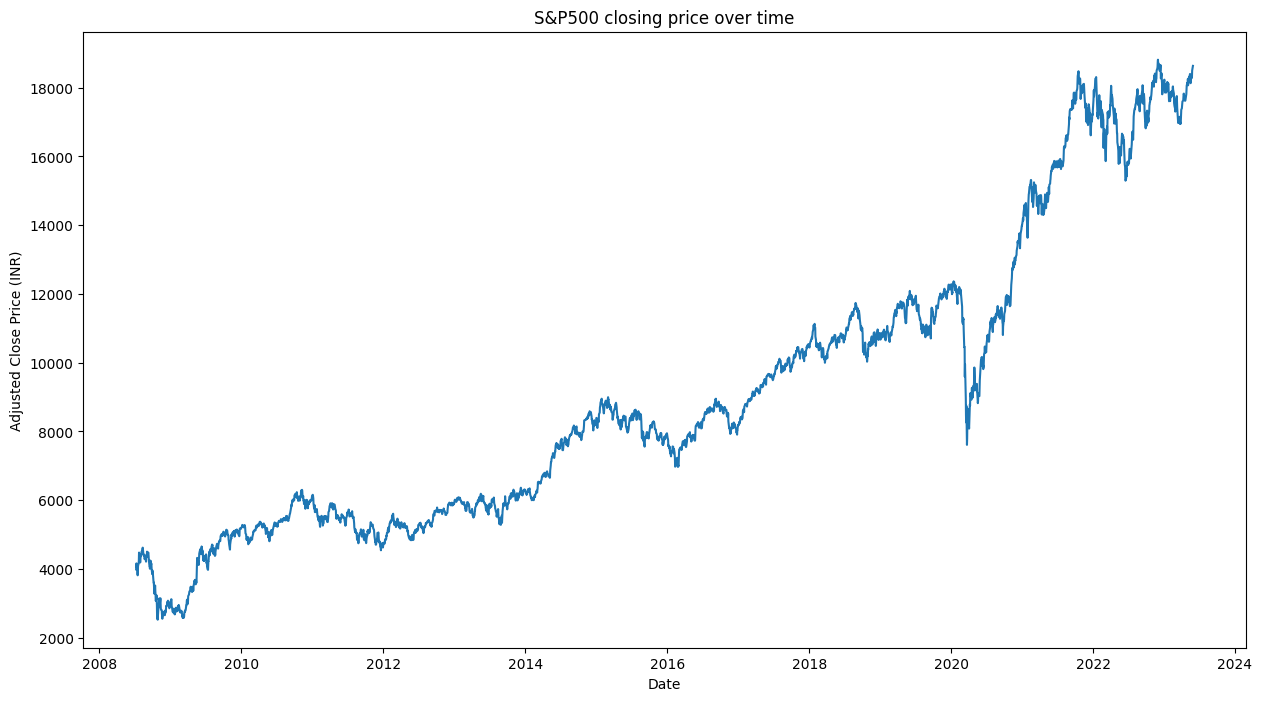

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Date", y="adjclose", data=nifty50_df)
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
plt.title("S&P500 closing price over time") 
plt.show(fig)

We can look at the average adjusted close price for each month over the years from 2008 onwards to see when the stock index was at it's highest price. As expected the price has become higher as time passes.

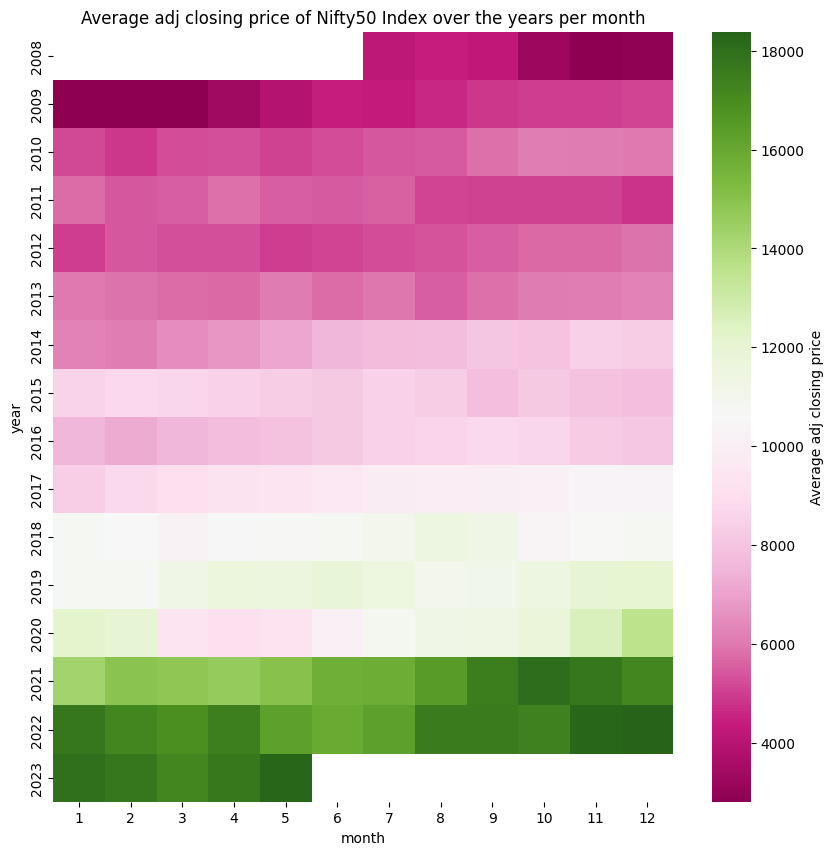

In [ ]:
year_month_adj_close_df = nifty50_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(year_month_adj_close_df.loc[year_month_adj_close_df.index > 2007], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
plt.title("Average adj closing price of Nifty50 Index over the years per month")
plt.show()

Here are all the various stock index attributes. There are no major differences between the various prices recorded. 

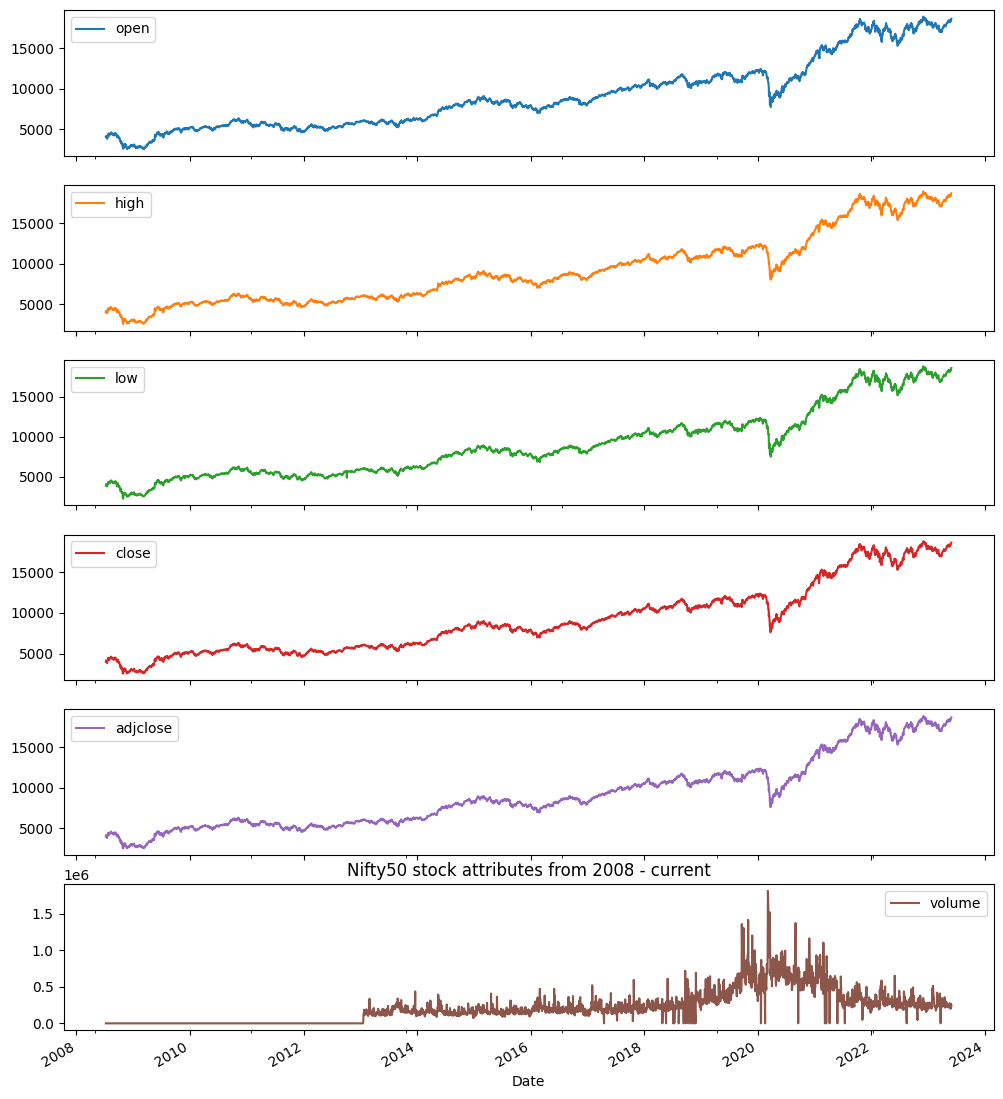

In [ ]:
nifty50_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
plt.title('Nifty50 stock attributes from 2008 - current')
plt.show()

Here's a plot which shows the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two prices than we can see from looking at separate plots. 

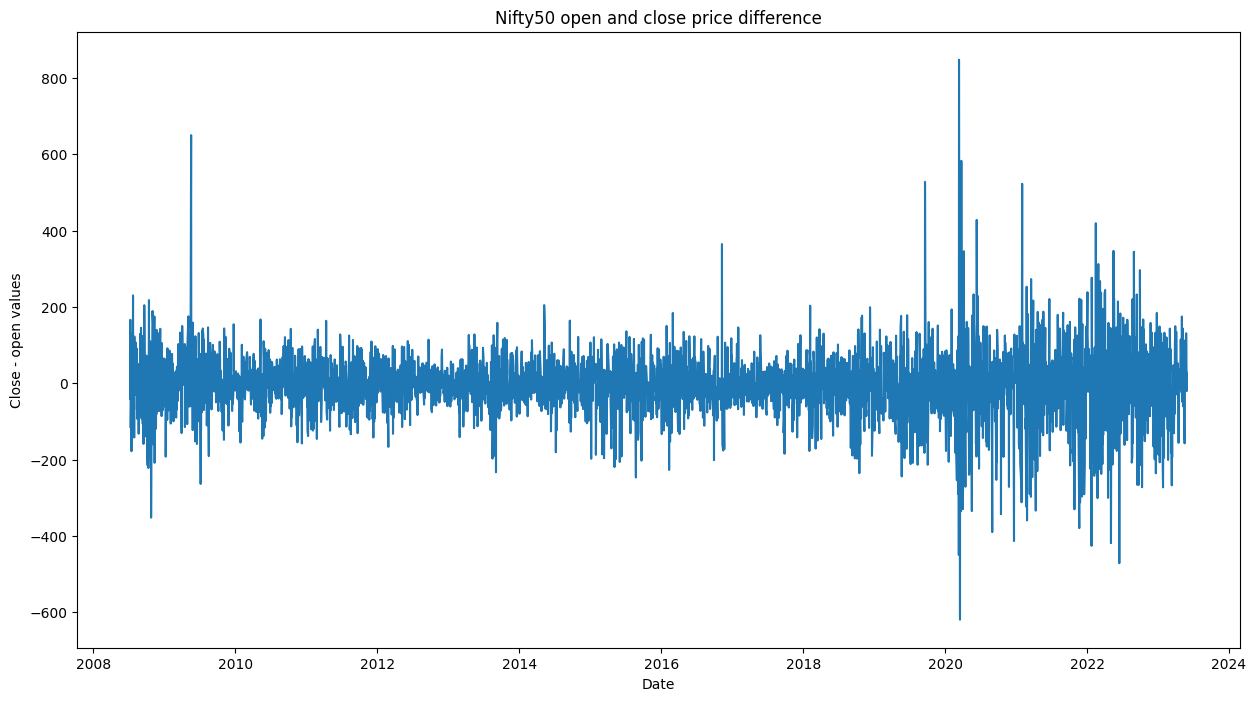

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(nifty50_df['openclose'])
plt.title('Nifty50 open and close price difference')
plt.xlabel("Date")
plt.ylabel("Close - open values")
plt.show()

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

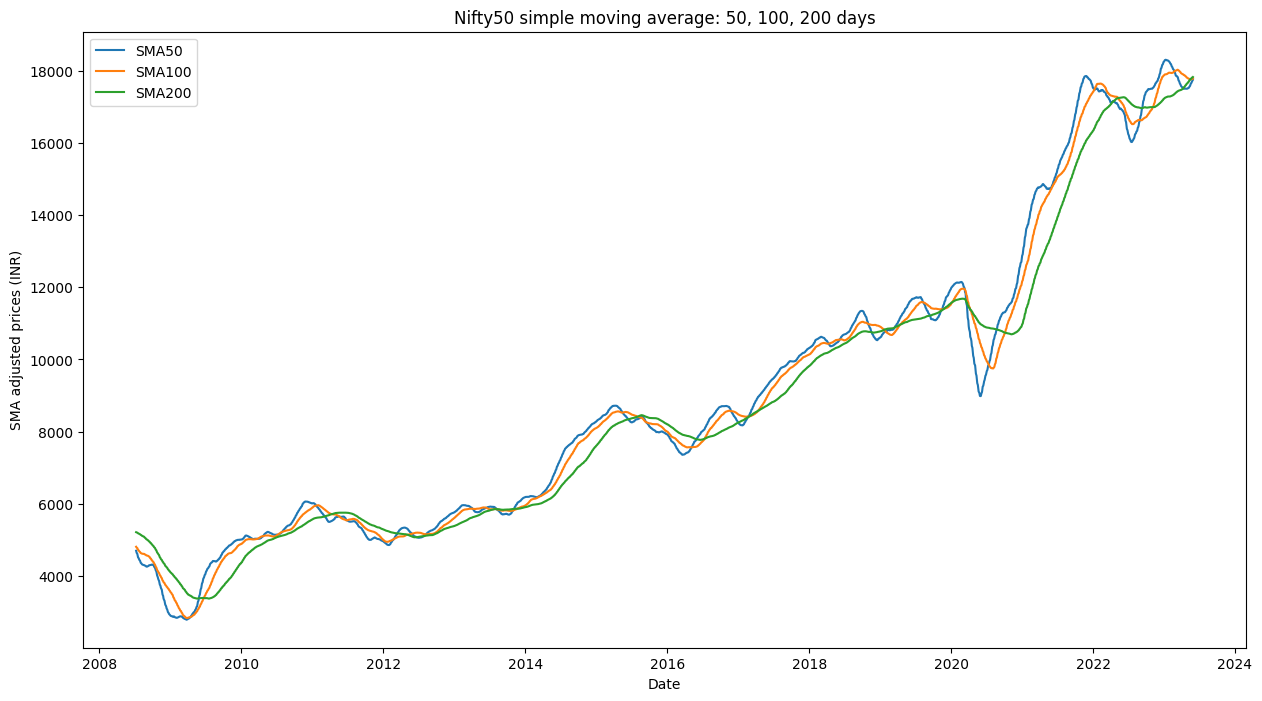

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(nifty50_df[['sma50', 'sma100', 'sma200', ]])
plt.title('Nifty50 simple moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("SMA adjusted prices (INR)")
plt.legend(["SMA50", "SMA100", "SMA200"])
plt.show()

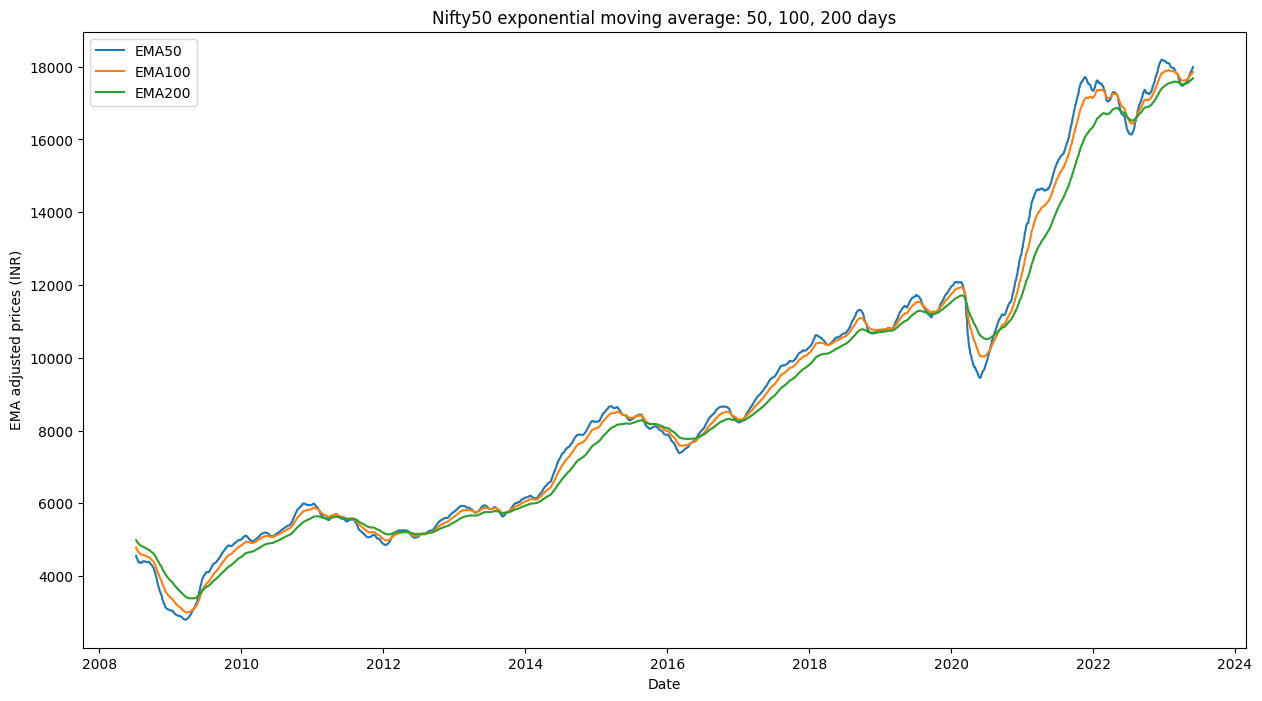

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(nifty50_df[['ema50', 'ema100', 'ema200', ]])
plt.title('Nifty50 exponential moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("EMA adjusted prices (INR)")
plt.legend(["EMA50", "EMA100", "EMA200"])
plt.show()

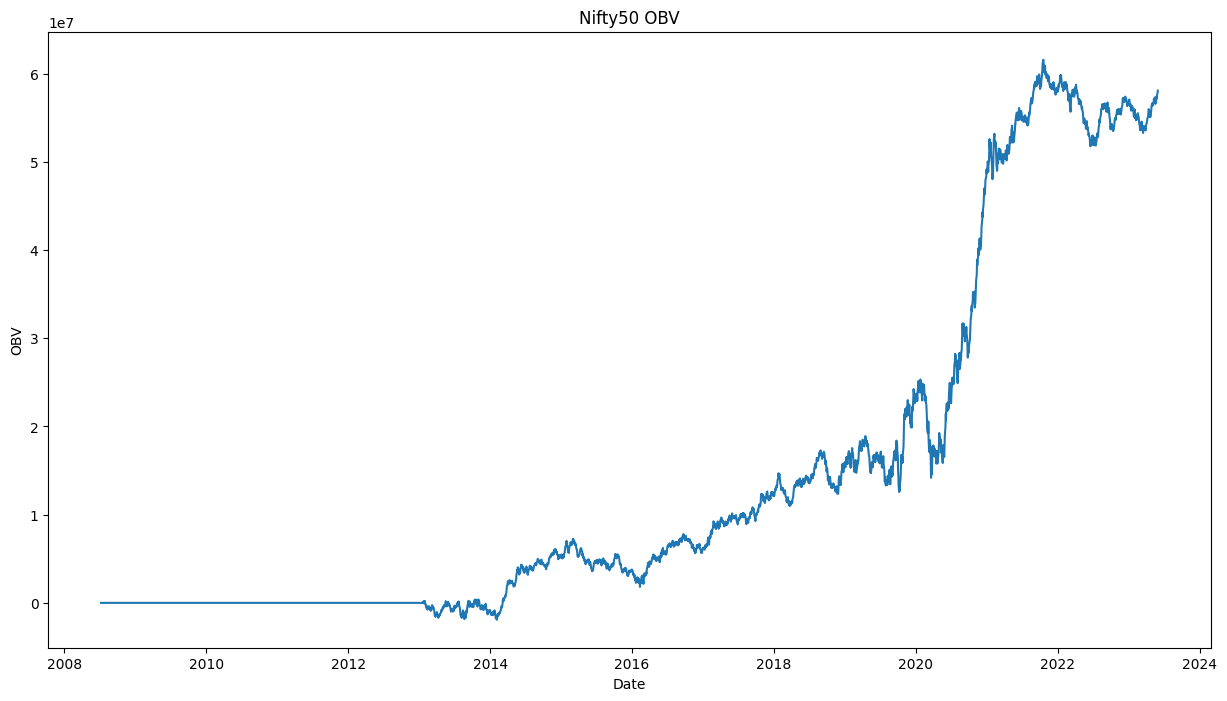

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(nifty50_df["obv"])
plt.title('Nifty50 OBV')
plt.xlabel("Date")
plt.ylabel("OBV")
plt.show()

### Bank Nifty

We'll start off by looking at some numbers like mean, min and max, and count in order to better understand the data.

In [ ]:
banknifty_df.describe()

,open,high,low,close,adjclose,volume,dayofweek,month,year,quarter,...,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_14_A_60,RSI_14_B_40,obv
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3.337000e+03,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3.337000e+03
mean,19824.944590,19986.745224,19635.520748,19812.556571,19812.335028,6.907665e+05,1.987414,6.514834,2015.363500,2.501948,...,19549.617804,19299.264338,18828.872402,72.114625,0.008556,72.106069,53.661940,0.326341,0.156128,5.412294e+07
std,10655.043080,10713.355749,10578.196867,10647.879242,10647.772961,3.143069e+07,1.409699,3.454636,4.438025,1.118870,...,10480.550673,10289.996657,9952.661152,399.568093,117.865910,377.223309,12.912856,0.468944,0.363031,2.736054e+08
min,3385.399902,3446.750000,3314.550049,3339.699951,3339.661133,0.000000e+00,0.000000,1.000000,2008.000000,1.000000,...,4083.566058,4448.348754,5039.432182,-3212.696000,-908.977971,-2756.356971,12.187978,0.000000,0.000000,-9.126500e+07
25%,10526.400391,10635.900391,10419.099609,10519.549805,10519.427734,0.000000e+00,1.000000,3.000000,2011.000000,1.000000,...,10476.568927,10614.340827,10481.343353,-117.250074,-56.997936,-110.590309,44.363971,0.000000,0.000000,-2.696180e+07
50%,18242.949219,18383.650391,18042.250000,18245.599609,18245.386719,0.000000e+00,2.000000,7.000000,2015.000000,3.000000,...,18075.966693,17869.747085,17420.396094,87.016390,-2.548557,91.795340,53.936740,0.000000,0.000000,0.000000e+00
75%,27767.650391,27988.199219,27560.000000,27764.599609,27764.277344,2.720000e+04,3.000000,9.000000,2019.000000,3.000000,...,27250.587171,26808.799795,26410.631932,272.624115,53.994615,260.737610,63.123432,1.000000,0.000000,1.498836e+08
max,44078.601562,44151.800781,43987.949219,44049.101562,44048.589844,1.798102e+09,4.000000,12.000000,2023.000000,4.000000,...,42380.076724,41380.502397,40057.294454,1531.939936,590.182037,1390.928923,88.165992,1.000000,1.000000,1.957937e+09


Here are the top 3 closing prices.

In [ ]:
banknifty_df.sort_values('adjclose' , ascending=False)[['adjclose']][:3]

,adjclose
Date,
2022-12-14,44048.589844
2022-12-13,43946.039062
2022-12-12,43708.242188


Now we'll look at the stock indexes performance over time.

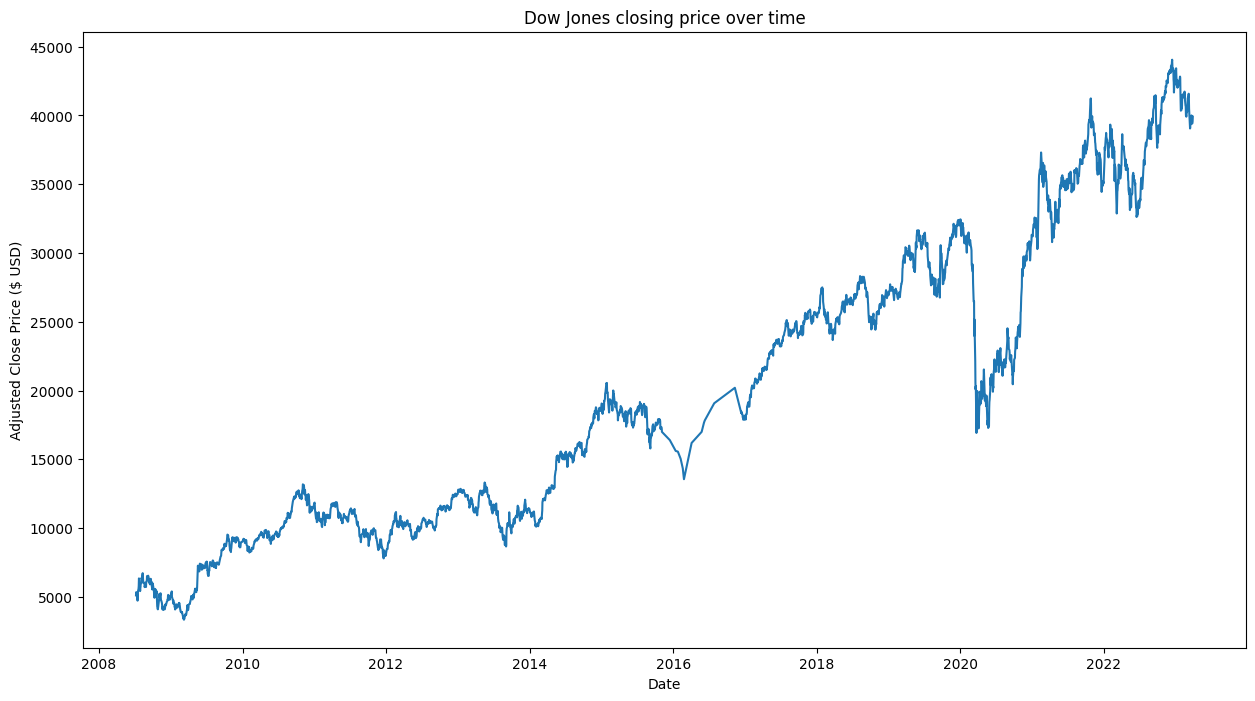

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Date", y="adjclose", data=banknifty_df)
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price ($ USD)")
plt.title("Dow Jones closing price over time") 
plt.show(fig)

Here's another way that we can view the same information. We can look at the average adjusted close price for each month over the years from 2008 onwards to see when the stock index was at it's highest price. As expected the price has become higher as time passes.

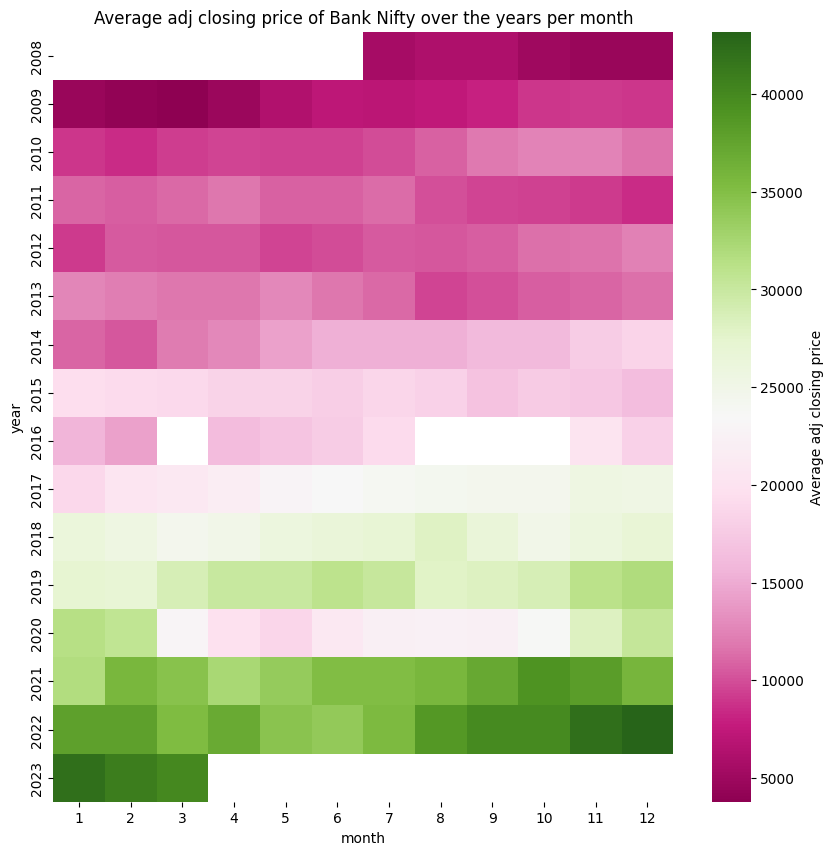

In [ ]:
banknifty_year_month_adj_close_df = banknifty_df.pivot_table(index='year', columns='month', values='adjclose', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(banknifty_year_month_adj_close_df.loc[banknifty_year_month_adj_close_df.index > 1992], cmap="PiYG", cbar_kws={'label': 'Average adj closing price'})
plt.title("Average adj closing price of Bank Nifty over the years per month")
plt.show()

Here are all the attributes of the stock index. There are no major differences between the various prices recorded. 

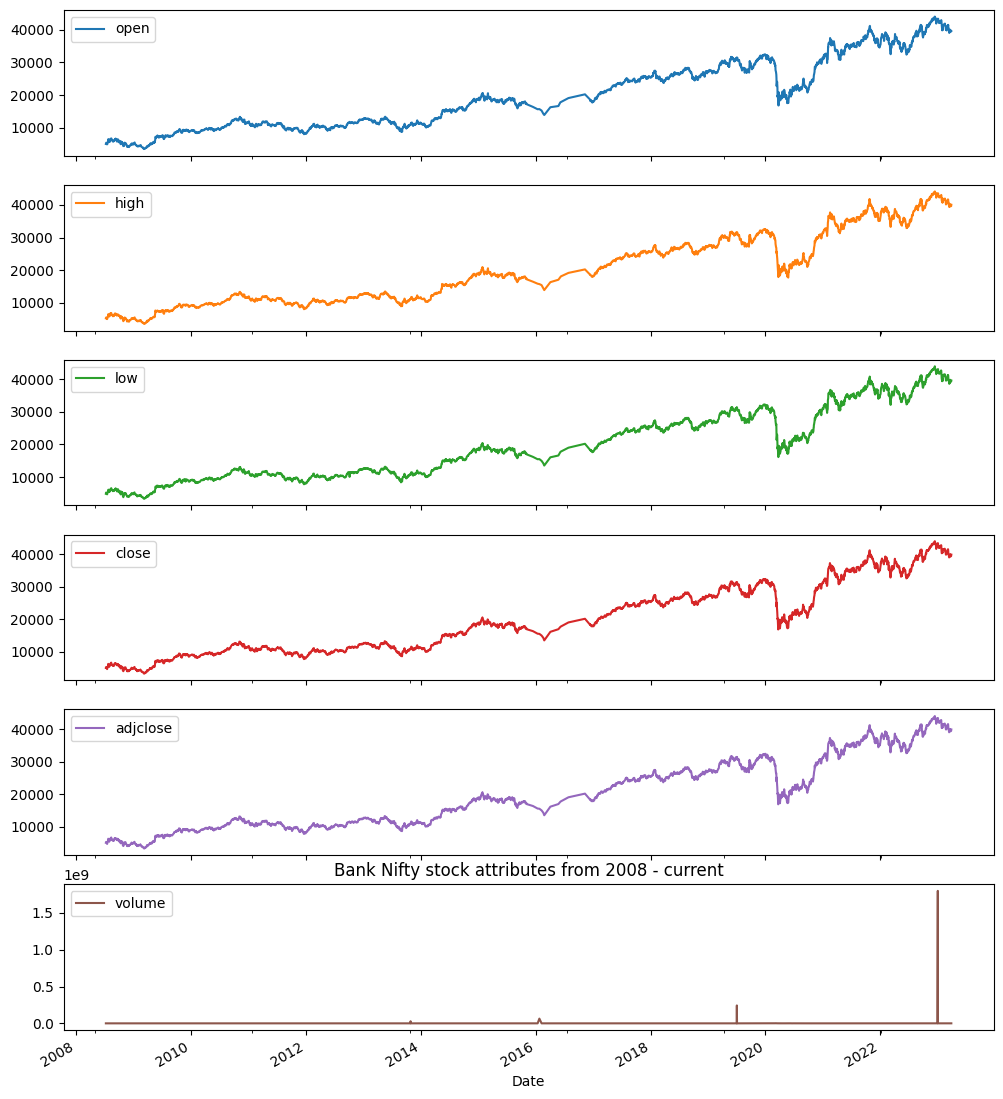

In [ ]:
banknifty_df[["open", "high", "low", "close", "adjclose", "volume"]].plot(subplots=True, figsize=(12,15))
plt.title('Bank Nifty stock attributes from 2008 - current')
plt.show()

Here's a plot which showcases the differences between the opening and closing prices each day. This plot shows that there are bigger differences between the two than we can see from looking at separate plots.

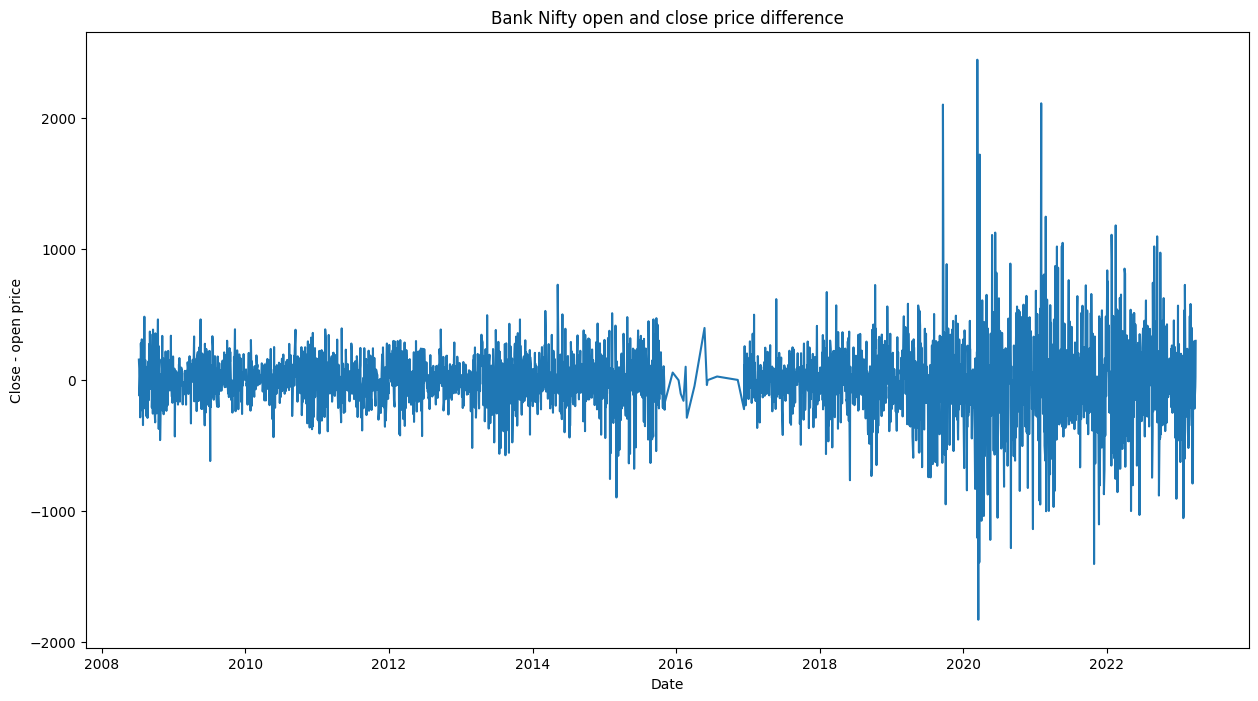

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(banknifty_df['openclose'])
plt.title('Bank Nifty open and close price difference')
plt.xlabel("Date")
plt.ylabel("Close - open price")
plt.show()

We can also look at a few of the investment features. For the sake of keeping this project length to a minimum, we won't plot MCAD or RSI as this would take ample exaplanation in order to understand the plots.

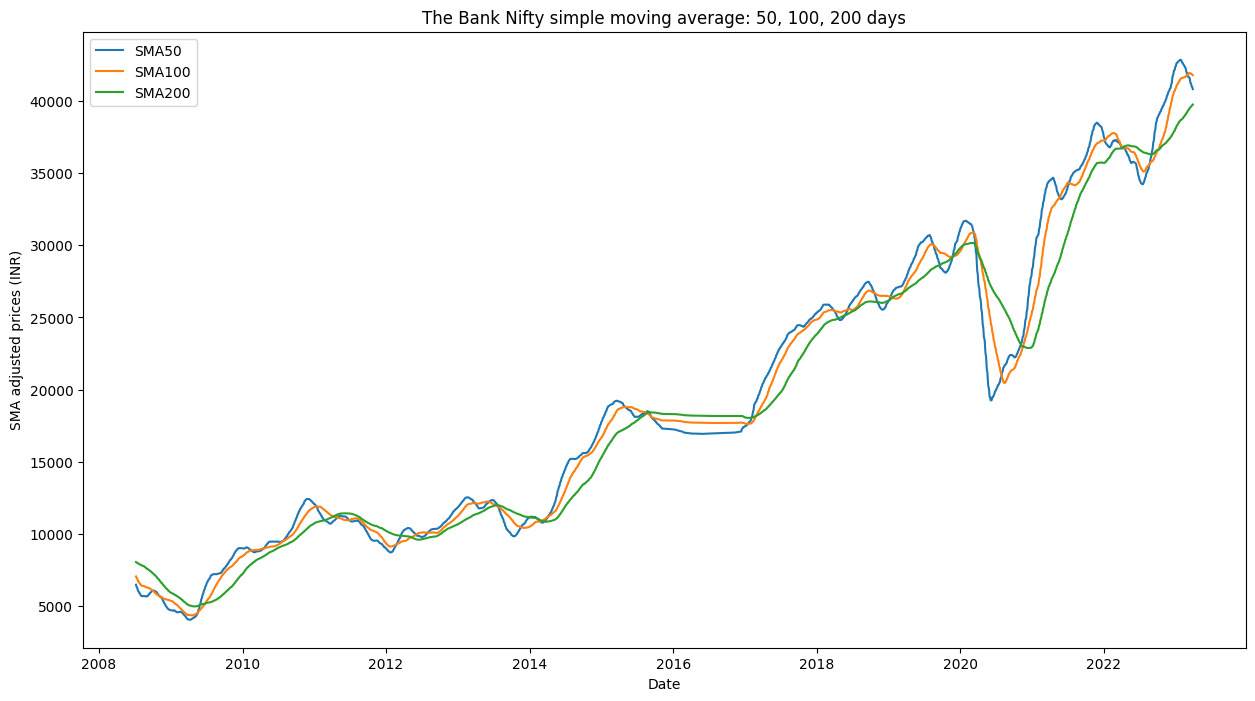

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(banknifty_df[['sma50', 'sma100', 'sma200']])
plt.title('The Bank Nifty simple moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("SMA adjusted prices (INR)")
plt.legend(["SMA50", "SMA100", "SMA200"])
plt.show()

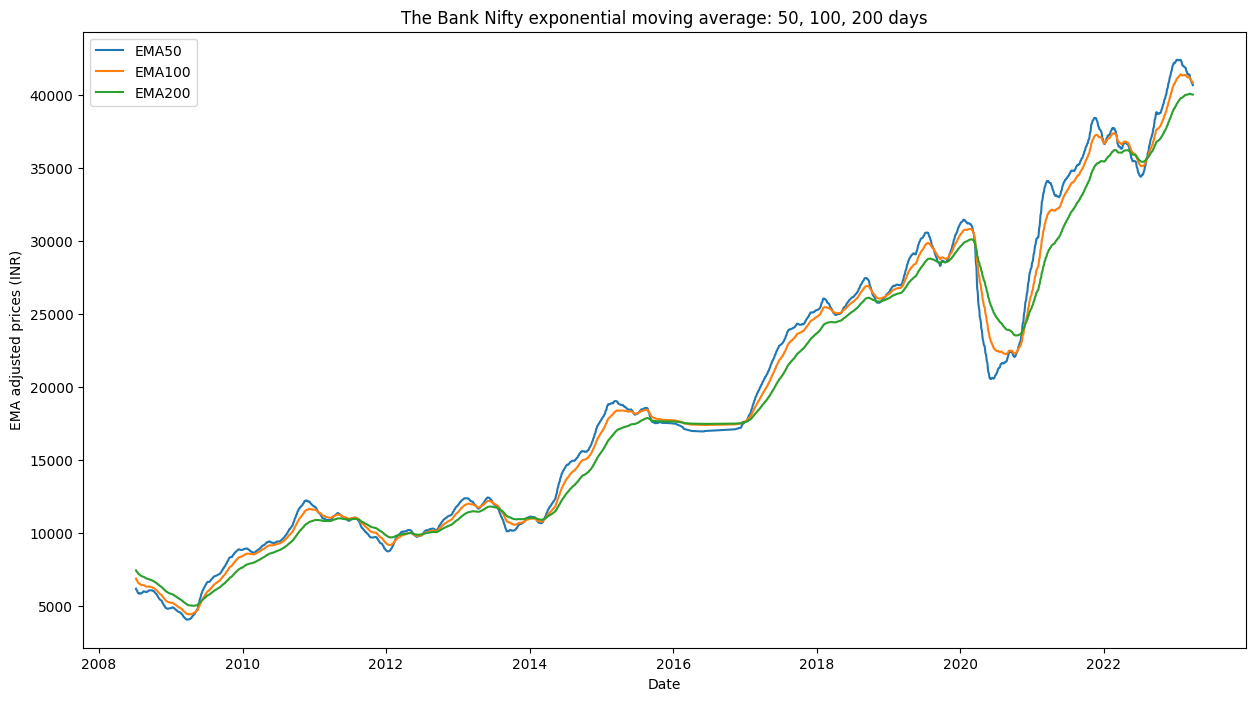

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(banknifty_df[['ema50', 'ema100', 'ema200']])
plt.title('The Bank Nifty exponential moving average: 50, 100, 200 days')
plt.xlabel("Date")
plt.ylabel("EMA adjusted prices (INR)")
plt.legend(["EMA50", "EMA100", "EMA200"])
plt.show()

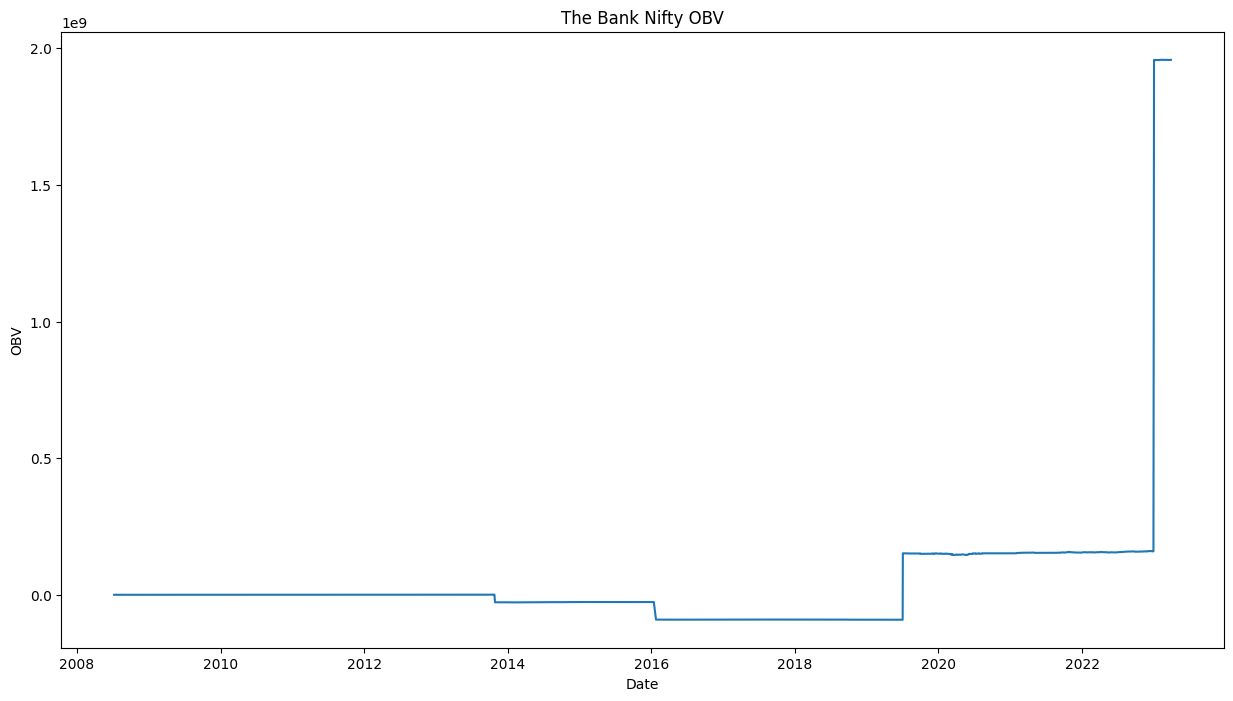

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(banknifty_df["obv"])
plt.title('The Bank Nifty OBV')
plt.xlabel("Date")
plt.ylabel("OBV")
plt.show()

### Looking at all of the stock indexes

We'll now look at some visualisations of all of the data combined. To do so we'll create a merged data frame where each stock index can be identified by it's shorthand name.

In [ ]:
nifty50_added_ticker_df = nifty50_df.copy()
nifty50_added_ticker_df["index"] = "nifty50"

banknifty_added_ticker_df = banknifty_df.copy()
banknifty_added_ticker_df["index"] = "banknifty"

stock_index_list = [nifty50_added_ticker_df, banknifty_added_ticker_df]
merged_df = pd.concat(stock_index_list)
merged_df

,open,high,low,close,adjclose,volume,RSI_14,RSI_14_A_60,RSI_14_B_40,dayofweek,...,sma100,sma200,ema50,ema100,ema200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,obv,index
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-08,4028.699951,4028.699951,3896.050049,3988.550049,3988.550049,0,35.188350,0,1,1,...,4806.760994,5210.716744,4550.410206,4788.477619,4986.463775,-199.038137,-10.101727,-188.936410,0.000000e+00,nifty50
2008-07-09,3990.899902,4169.399902,3990.899902,4157.100098,4157.100098,0,43.535805,0,0,2,...,4795.442993,5208.186245,4528.369378,4772.347932,4974.998031,-180.977843,6.366853,-187.344696,0.000000e+00,nifty50
2008-07-10,4155.649902,4187.950195,4110.399902,4162.200195,4162.200195,0,43.771793,0,0,3,...,4788.443994,5206.240745,4513.805293,4759.946604,4965.615062,-164.358769,18.388742,-182.747511,0.000000e+00,nifty50
2008-07-11,4166.000000,4215.500000,4014.449951,4049.000000,4049.000000,0,39.796121,0,1,4,...,4781.683496,5203.389995,4500.012759,4747.902317,4956.412248,-158.495308,19.401762,-177.897070,0.000000e+00,nifty50
2008-07-14,4047.449951,4118.100098,4004.250000,4039.699951,4039.699951,0,39.478870,0,1,0,...,4772.878994,5199.897246,4482.320932,4733.824683,4946.033797,-152.837098,20.047978,-172.885076,0.000000e+00,nifty50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,39836.148438,40201.601562,39552.500000,39616.898438,39616.898438,153200,41.900968,0,0,3,...,41847.204023,39659.007705,40841.208216,40925.729526,40014.914664,-419.136887,-5.719243,-413.417644,1.957105e+09,banknifty
2023-03-24,39555.250000,39767.898438,39294.898438,39395.351562,39395.351562,166100,39.880851,0,1,4,...,41833.464492,39680.716943,40793.196068,40899.812079,40010.954303,-426.687743,-10.616079,-416.071664,1.956939e+09,banknifty
2023-03-27,39484.699219,39695.199219,39273.750000,39431.300781,39431.300781,194200,40.383113,0,0,0,...,41814.339023,39701.142705,40738.378636,40870.020781,40004.828903,-424.873373,-7.041367,-417.832006,1.957133e+09,banknifty


In [ ]:
index_list = ['nifty50', 'banknifty']

def plot_index(index_list):
    plt.figure(figsize=(20,8))
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price (INR)")
    plt.title("Both stock indexes closing prices over time") 
    for index in index_list:
        plt.plot(merged_df.loc[merged_df['index'] == index].year, merged_df.loc[merged_df['index'] == index]['adjclose'], label=index);
    plt.legend()
    plt.show()

In this visual we can see each stock index on the same plot.

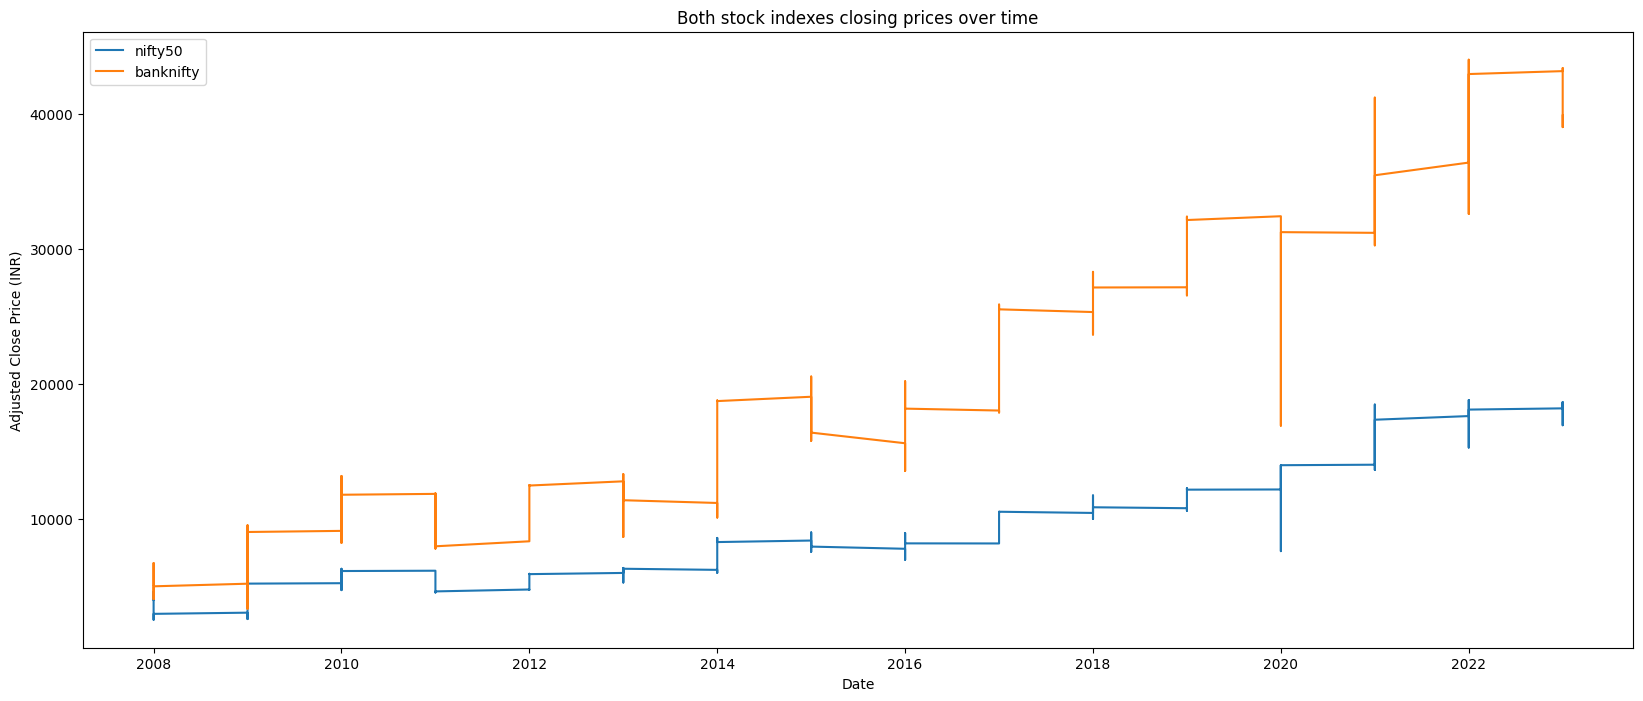

In [ ]:
plot_index(index_list)

Let's look at individual plots of each stock index but side by side so we can see how the closing prices compare over time, as well as the differences between closing and opening prices.

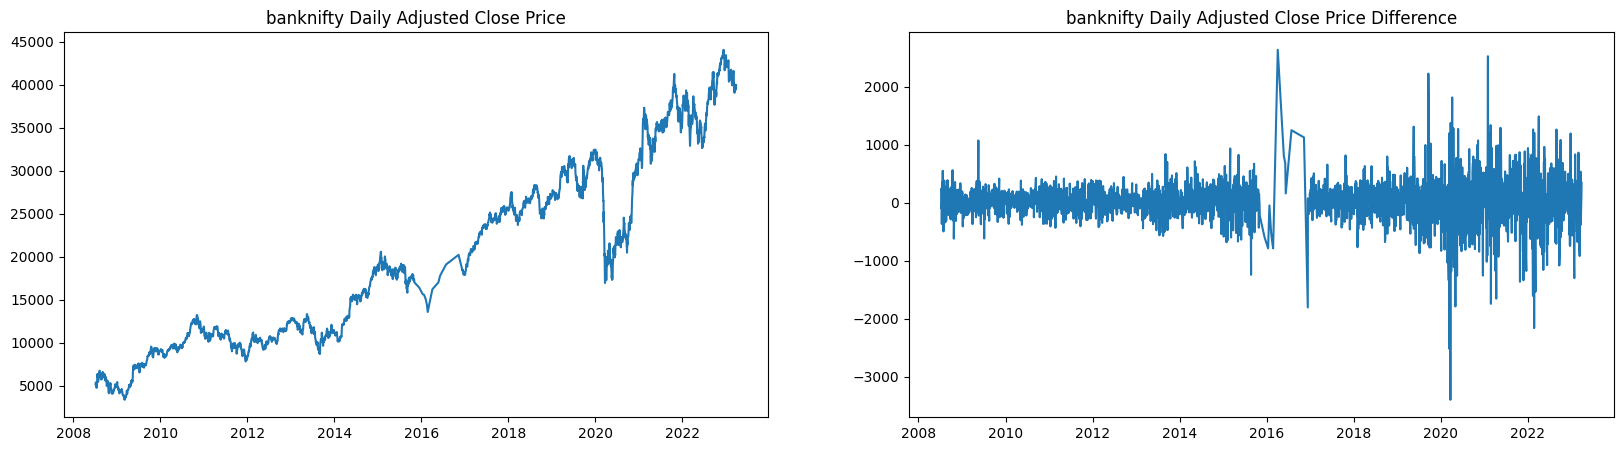

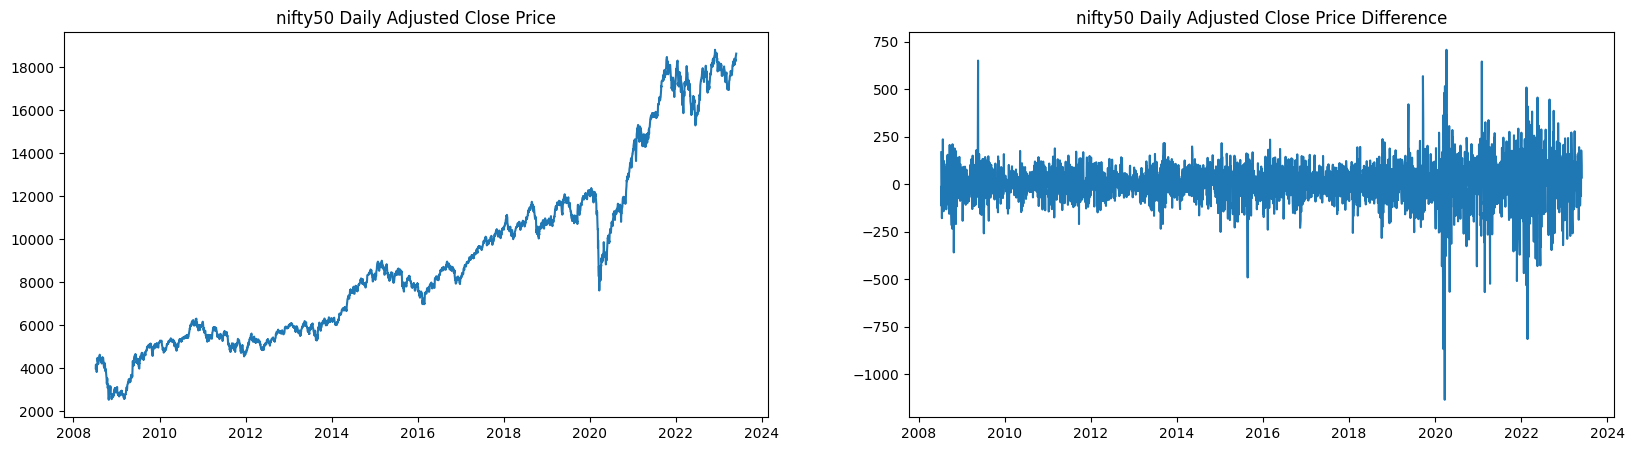

In [ ]:
df_sort = merged_df.sort_values(['index','Date'])
df_sort

for i in df_sort['index'].unique() : 
    
    fig , axs = plt.subplots(nrows=1 , ncols=2 , figsize=(20,5))
    
    axs[0].plot(df_sort[df_sort['index'] == i]['adjclose'])

    axs[1].plot(df_sort[df_sort['index'] == i]['adjclose'].diff())
    
    axs[0].set_title(f'{i} Daily Adjusted Close Price')
    axs[1].set_title(f'{i} Daily Adjusted Close Price Difference')
    
    plt.show()

Now let's consider average adjusted close prices over different time periods such as days of the week, months of the year, etc.

First we'll look at the average closing prices of all 4 stock indexes for each day of the week. Note that stock markets are only open Monday to Friday so the days of the week will be shown as: 0 = Monday, 1 = Tuesday, and so on.

It looks like the only visible trend is that Mondays are on average the day of the week with the lowest adjusted closing price.

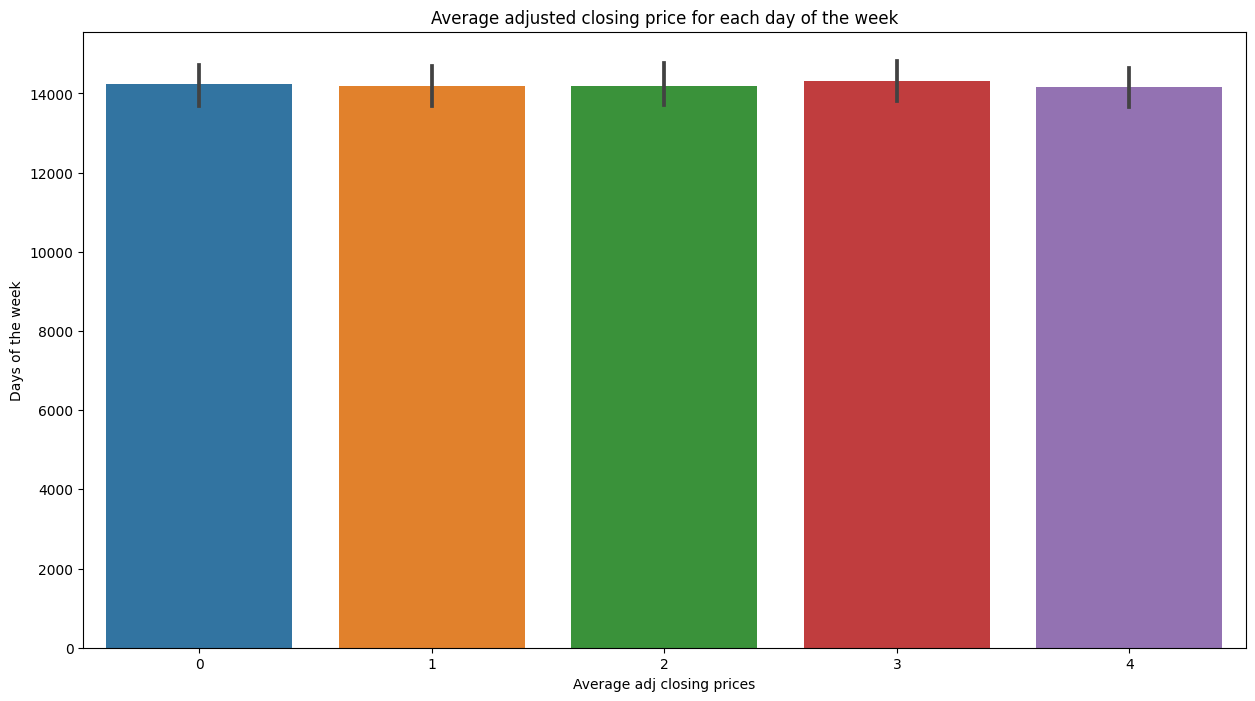

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=merged_df, x='dayofweek', y='adjclose')
plt.xlabel("Average adj closing prices")
plt.ylabel("Days of the week")
plt.title("Average adjusted closing price for each day of the week")
plt.show(fig);

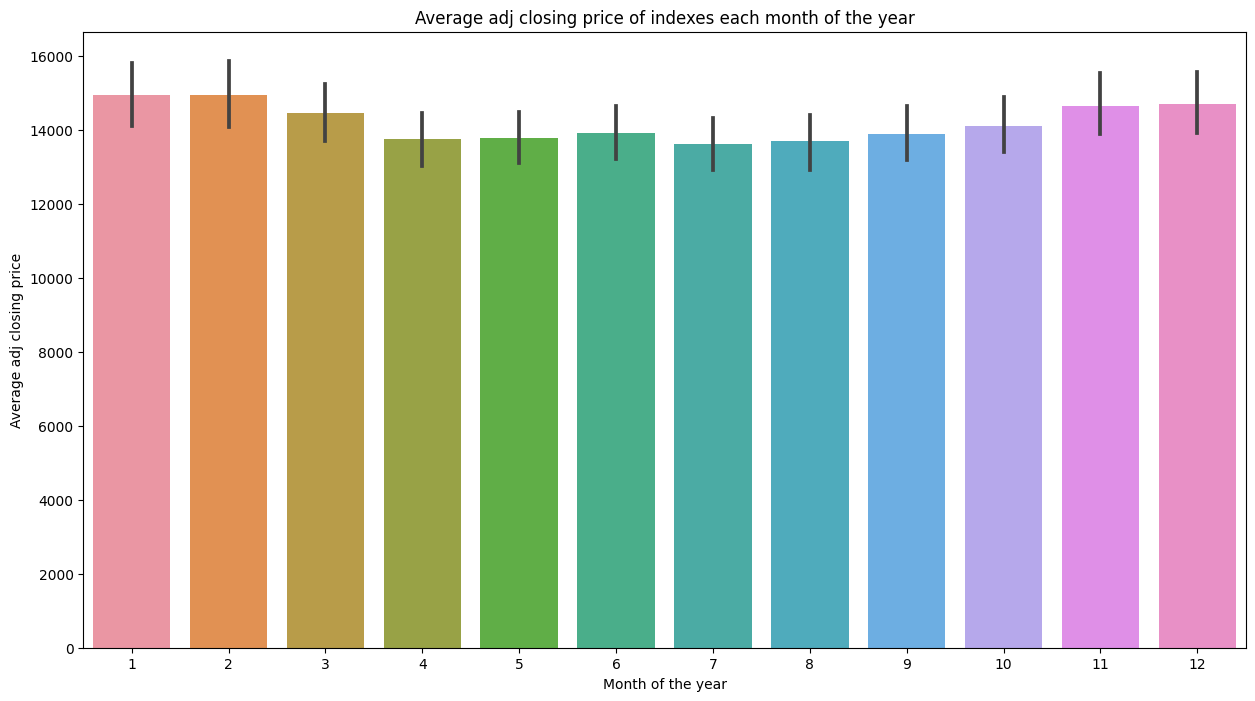

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='month', y='adjclose')
plt.title('Average adj closing price of indexes each month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Average adj closing price');

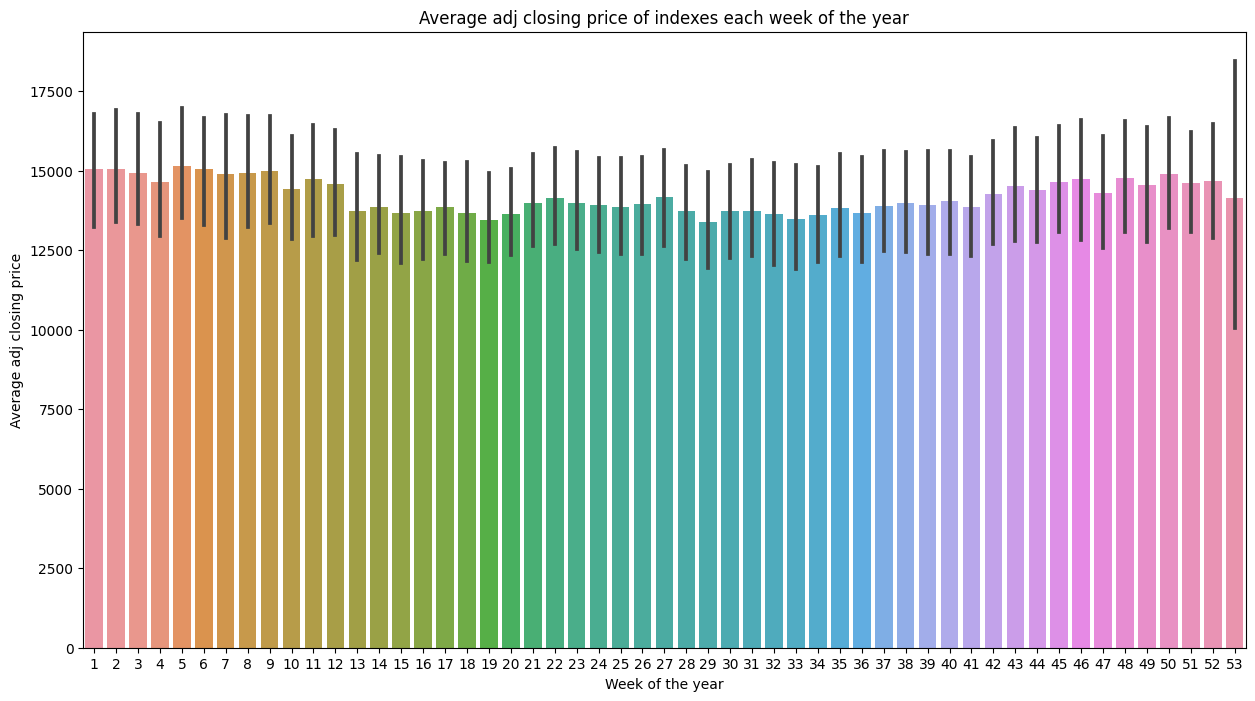

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='weekofyear', y='adjclose')
plt.title('Average adj closing price of indexes each week of the year')
plt.xlabel('Week of the year')
plt.ylabel('Average adj closing price');

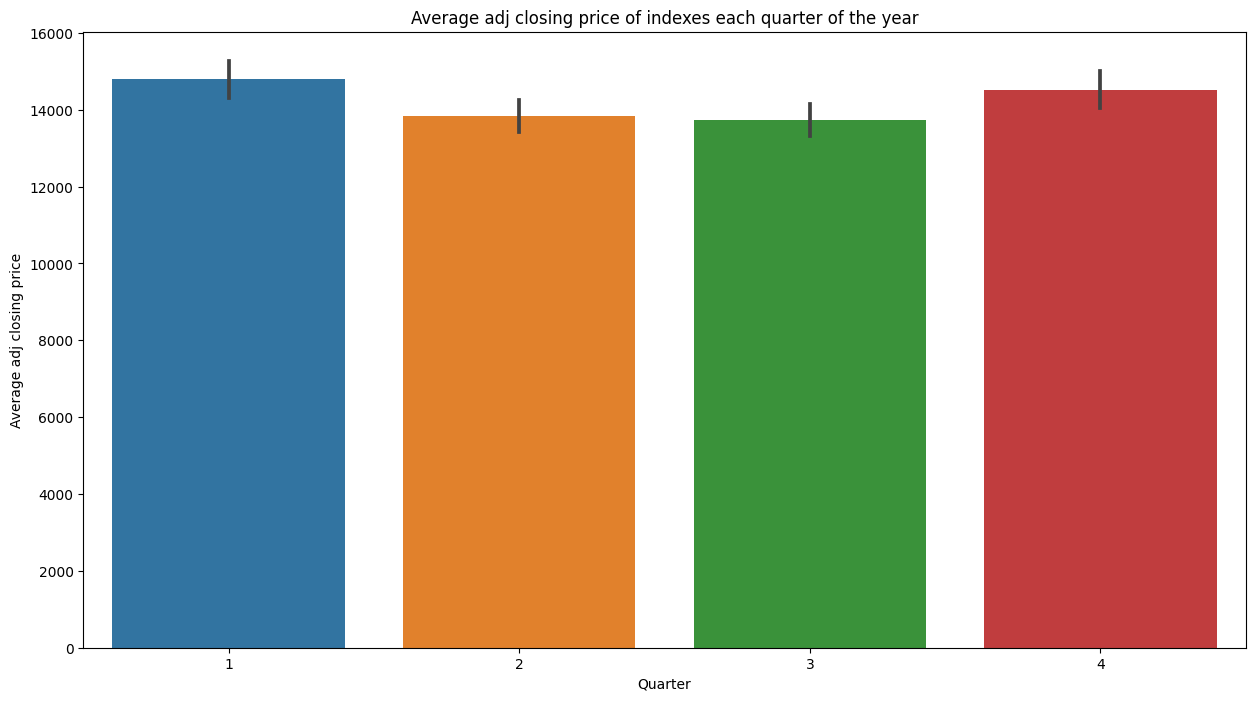

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=merged_df, x='quarter', y='adjclose')
plt.title('Average adj closing price of indexes each quarter of the year')
plt.xlabel('Quarter')
plt.ylabel('Average adj closing price');

Now we'll look at the total amount of adjusted closing prices over time, from the same start and end date for a fair comparison, to see how the stock indexes compare to one another in price volume.


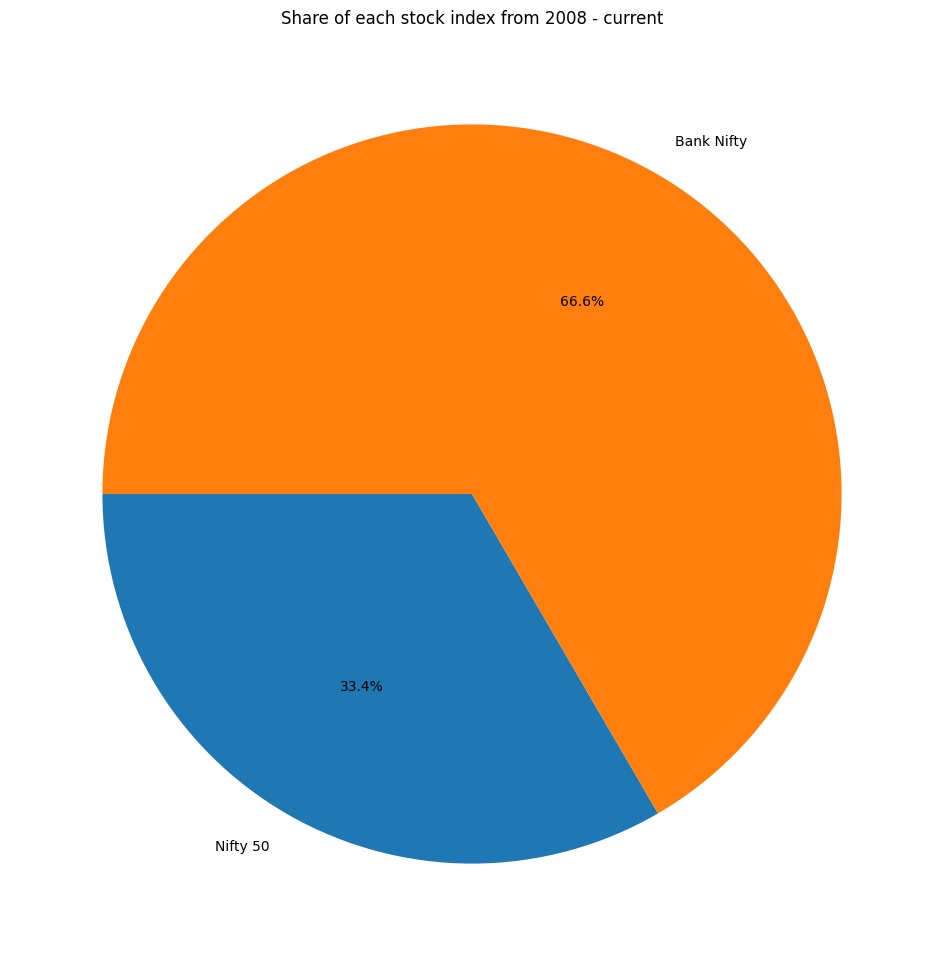

In [ ]:
nifty50_market = nifty50_df.loc[nifty50_df.index > "2008-08-08"]["adjclose"].sum()

banknifty_market = banknifty_df.loc[banknifty_df.index > "2008-08-08"]["adjclose"].sum()

d = {'index_name': ['Nifty 50', 'Bank Nifty'], 'market_share': [nifty50_market, banknifty_market]}


market_share_df = pd.DataFrame(data=d)

market_share_df

plt.figure(figsize=(12,12))
plt.title("Share of each stock index from 2008 - current")
plt.pie(market_share_df.market_share, labels=market_share_df.index_name, autopct='%1.1f%%', startangle=180);

## Preparing the data for all models: shift targets and identify inputs / target columns

We're now ready to start preparing our data for the models that we create. 

First thing we're going to do is shift the adjusted close column one day backwards. When we predict stock index prices, we want to be looking ahead - in order to achieve this we're going to shift the column back by one day so that the target of a row is the following day.

We'll create a function that we can apply to each stock index.

In [ ]:
def adj_close_shift(df):
    df2 = df.copy()
    df2['adjclose'] = df2['adjclose'].shift(-1)
    
    df2 = df2.dropna()
    
    return df2

In [ ]:
nifty50_df = adj_close_shift(nifty50_df)
banknifty_df = adj_close_shift(banknifty_df)

Now we'll identify the input and target columns.

We're not going to use any of the price columns (open, low, high, close) because these factors essentially tell us the adjusted closing price. Instead, we're going to rely on the other columns that refer to time and stock features to predict the values of the next day.

In [ ]:
input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60', 
              'RSI_14_B_40', 'obv']
target_col = 'adjclose'

## Linear Regression Model

Before we train 2 models that are a bit complex, we'll create a basic linear regression model as a base line. We know that our stock index prices are not linear, so we can assume this model won't be a great choice. With that being said, this will give us a low bar to be improved upon with our other two models.

### Preparing the data for modeling: train-test splits

We're going to split our data sets into train-test sets (we won't create a validation set as there are no hyperparameters to tune for a Linear Regression model. 

I'll be splitting the data based on intervals of time since time is a very important factor in index stock price fluctuations. I'll be splitting each data set so that 90% of the data is for training and 10% is for testing.

In [ ]:
def linear_train_test_split(df):

    input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60', 
              'RSI_14_B_40','obv']
    target_col = 'adjclose'

    train_len = math.ceil(len(df)*0.9)

    train_df = df.copy()[:train_len]
    train = train_df[input_cols]
    train_targets = train_df[target_col]

    test_df = df[train_len:].copy()
    test = test_df[input_cols]
    test_targets = test_df[target_col]

    return train, train_targets, test, test_targets

In [ ]:
X_nifty50_linear, Y_nifty50_linear, X_test_nifty50_linear, Y_test_nifty50_linear = linear_train_test_split(nifty50_df)

X_banknifty_linear, Y_banknifty_linear, X_test_banknifty_linear, Y_test_banknifty_linear = linear_train_test_split(banknifty_df)

Here is the train-test split for the Nifty 50.

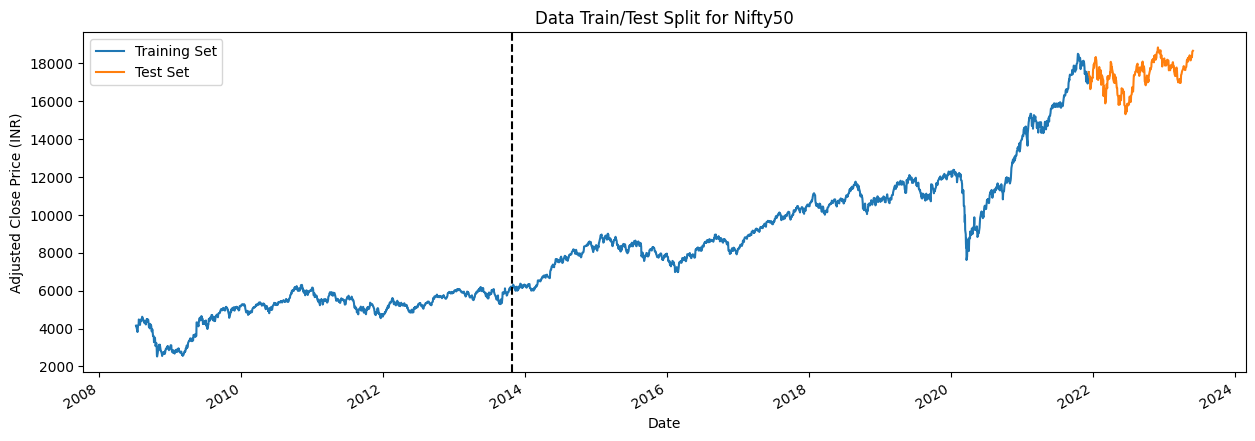

In [ ]:
train_len = math.ceil(len(nifty50_df)*0.9)

nifty50_train = nifty50_df[:train_len]
nifty50_test = nifty50_df[train_len:]

fig, ax = plt.subplots(figsize=(15, 5))
nifty50_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for Nifty50')
nifty50_test["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
ax.axvline('2013-10-23', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Here is the train-test split for the Bank Nifty.

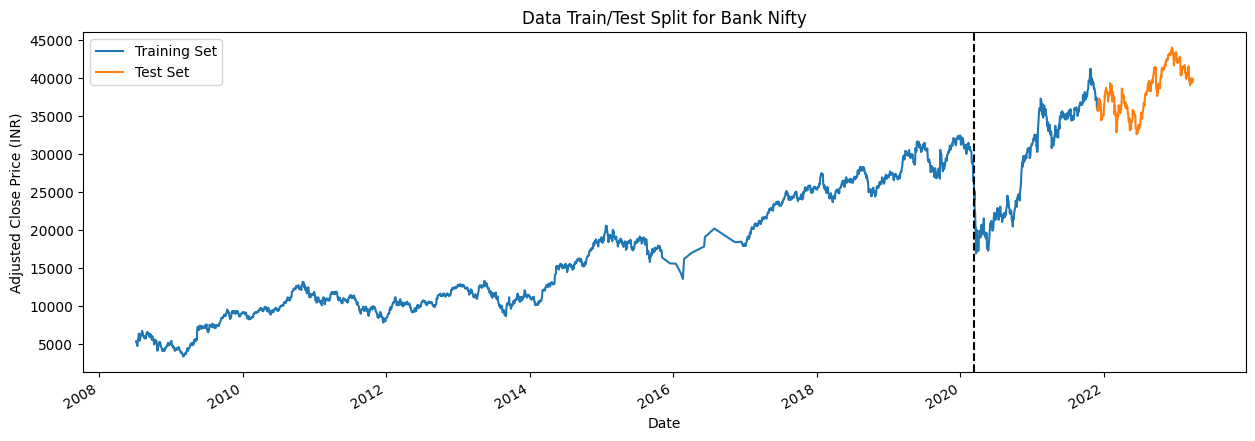

In [ ]:
train_len = math.ceil(len(banknifty_df)*0.9)

banknifty_train = banknifty_df[:train_len]
banknifty_test = banknifty_df[train_len:]

fig, ax = plt.subplots(figsize=(15, 5))
banknifty_train["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Test Split for Bank Nifty')
banknifty_test["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
ax.axvline('2020-03-12', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Preparing the data for modeling: scaling

Before we use models to predict future stock prices for each stock index, we'll use a scaler to normalise the data. Because stock prices do not necessarily have a maximum value, we'll use a Standard scaler as opposed to MinMaxScaler. 

We won't scale our target variable as there are numerous ideas about what is best practise, and I've determined that for our linear and XGBoost model we won't scale the targets.

We'll scale each data set individually for ease later on.

In [ ]:
scaler = StandardScaler().fit(X_nifty50_linear)
scaled_linear = scaler.transform(X_nifty50_linear)
X_nifty50_linear = pd.DataFrame(scaled_linear, columns=X_nifty50_linear.columns)

In [ ]:
scaler = StandardScaler().fit(X_nifty50_linear)
scaled_linear = scaler.fit_transform(X_test_nifty50_linear)
X_test_nifty50_linear = pd.DataFrame(scaled_linear, columns=X_nifty50_linear.columns)

In [ ]:
scaler = StandardScaler().fit(X_banknifty_linear)
scaled_linear = scaler.transform(X_banknifty_linear)
X_banknifty_linear = pd.DataFrame(scaled_linear, columns=X_banknifty_linear.columns)

In [ ]:
scaler = StandardScaler().fit(X_banknifty_linear)
scaled_linear = scaler.fit_transform(X_test_banknifty_linear)
X_test_banknifty_linear = pd.DataFrame(scaled_linear, columns=X_banknifty_linear.columns)

### Modeling: Linear Regression

We'll start by defining our model, linreg.

In [ ]:
linreg = LinearRegression()

We'll also define a function to calculate the root mean squared error of our various predictions. 

In [ ]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

We'll now create a function that can create, fit, and predict the train and test values for our stock indexes.

In [ ]:
def linreg_model(train_df, train_targets, test_df, test_targets):
    model = linreg.fit(train_df, train_targets)

    train_preds = model.predict(train_df)
    train_rmse = rmse(train_preds, train_targets)

    test_preds = model.predict(test_df)
    test_rmse = rmse(test_preds, test_targets)

    return train_preds, train_rmse, test_preds, test_rmse

#### Predicting Nifty 50

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [ ]:
nifty50_linear_preds, nifty50_linear_rmse, test_nifty50_linear_preds, nifty50_linear_test_rmse = linreg_model(X_nifty50_linear, Y_nifty50_linear, X_test_nifty50_linear, Y_test_nifty50_linear)
print("Linear train RSME:{}, linear test RMSE:{}".format(nifty50_linear_rmse, nifty50_linear_test_rmse))

Linear train RSME:108.57261947400035, linear test RMSE:9782.540163453243


Wow, the test set RMSE is the biggest I've ever seen in ML... 

Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [ ]:
nifty50_lin_model = LinearRegression().fit(X_nifty50_linear, Y_nifty50_linear)

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(nifty50_lin_model.coef_, nifty50_lin_model.intercept_)
})
weights_df.sort_values('weight', ascending=False).head(10)

,feature,weight
12,ema50,8603.917820
22,1,8179.629297
2,month,440.228993
16,MACDh_12_26_9,142.106462
15,MACD_12_26_9,73.970326
3,year,60.986352
11,sma200,47.276187
21,obv,46.395664
8,openclose,42.717057
6,dayofmonth,37.652017


EMA50 is highly important in calculating the future prices. The second value, 1, represents the gradient of our linear model.

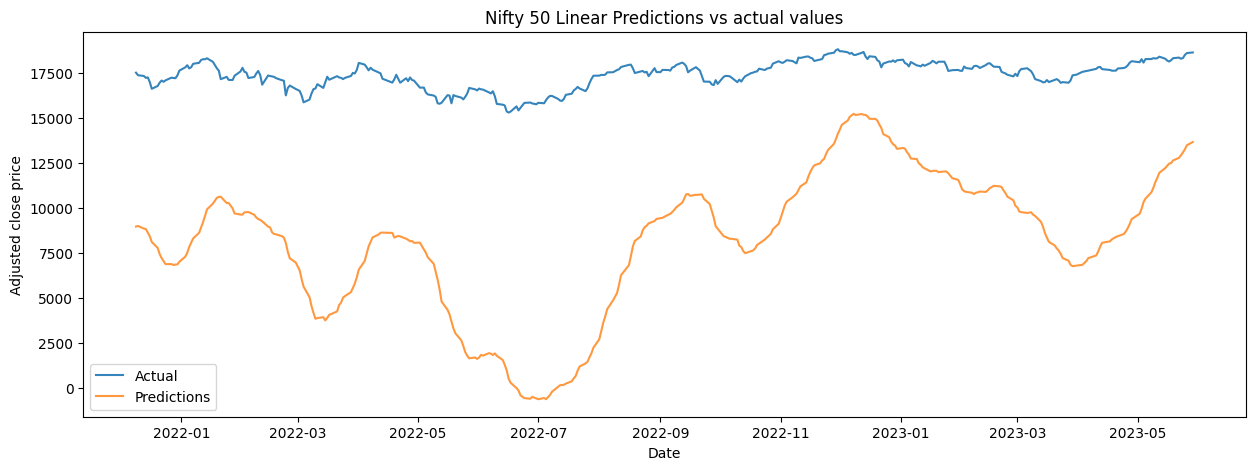

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train_len = math.ceil(len(nifty50_df)*0.9)

targets = nifty50_df[train_len:].adjclose
predictions = test_nifty50_linear_preds
    
plt.plot(nifty50_df[train_len:].index, targets, alpha=0.9);
plt.plot(nifty50_df[train_len:].index, predictions,alpha=0.8);
plt.title('Nifty 50 Linear Predictions vs actual values')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'Predictions']);

Our model predictions are much greater than the actual values. Let's see if we have any improvement for the following data sets.

#### Predicting the Bank Nifty

We'll start by fitting our model and calculating the predictions, followed by RMSE for the train and test sets.

In [ ]:
banknifty_linear_preds, banknifty_linear_rmse, test_banknifty_linear_preds, banknifty_linear_test_rmse = linreg_model(X_banknifty_linear, Y_banknifty_linear, X_test_banknifty_linear, Y_test_banknifty_linear)
print("Linear train RSME:{}, linear test RMSE:{}".format(banknifty_linear_rmse, banknifty_linear_test_rmse))

Linear train RSME:355.2591562877086, linear test RMSE:21827.488837569108


Now we'll look at the weights assigned to each feature in our model to understand what our model values.

In [ ]:
banknifty_lin_model = LinearRegression().fit(X_banknifty_linear, Y_banknifty_linear)

weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(banknifty_lin_model.coef_, banknifty_lin_model.intercept_)
})
weights_df.sort_values('weight', ascending=False).head(10)

,feature,weight
12,ema50,25272.832606
22,1,17758.533473
14,ema200,1010.578508
2,month,506.398405
16,MACDh_12_26_9,491.503081
15,MACD_12_26_9,242.872090
8,openclose,151.995059
18,RSI_14,113.365473
17,MACDs_12_26_9,108.149131
3,year,87.117919


For this model, it seems ema is the most important feature.

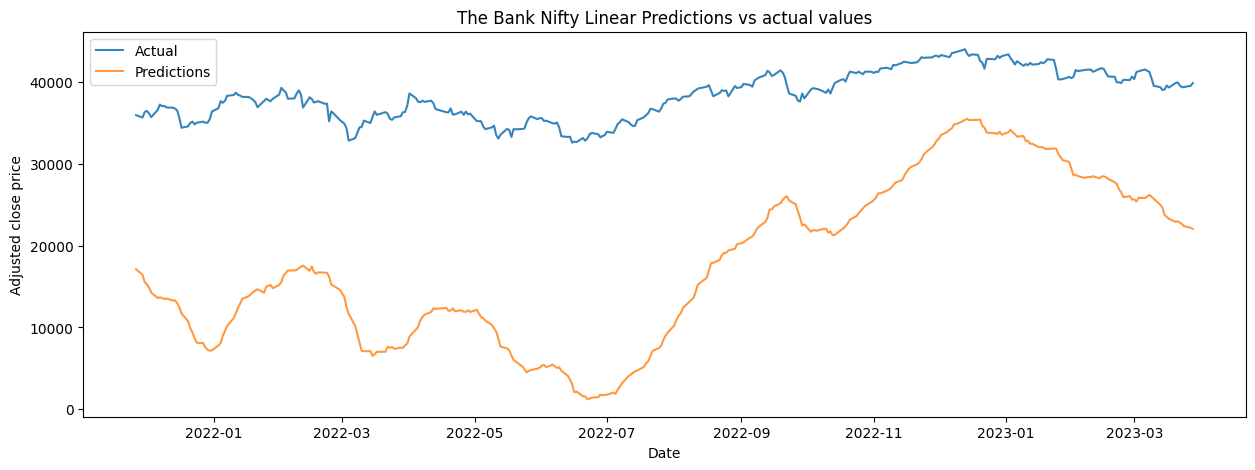

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train_len = math.ceil(len(banknifty_df)*0.9)

targets = banknifty_df[train_len:].adjclose
predictions = test_banknifty_linear_preds
    
plt.plot(banknifty_df[train_len:].index, targets, alpha=0.9);
plt.plot(banknifty_df[train_len:].index, predictions,alpha=0.8);
plt.title('The Bank Nifty Linear Predictions vs actual values')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'Predictions']);

The linear regression model has done about as well as it did for the Nifty50 set when predicting the Bank Nifty test targets.

### Closing thoughts about Linear Regression modeling

The Linear Regression model did not do a great job in predicting the stock index prices - but we expected this to be the case. It seems that each model heavily relied on EMA50, followed by SMA200 and EMA200. Although the shape of our predictions is quite similar, the difference in amount was quite substantial with the predictions always being of lesser value. 

This model is not a good model to use to predict future stock index prices but if it is being used, we can assume for these 2 stock indexes that the model will produce extremely moderate predictions.

## XGBoost Model

Now we're ready to try out the XGBoost model on our data.

### Preparing the data for modeling: train-test splits

We're going to split our data sets into train-validate-test sets.

I'll be splitting the data based on intervals of time since time is a very important factor in index stock price fluctuations. I'll be splitting each data set so that 80% of the data is for training, 10% is for validation, and 10% is for testing.

In [ ]:
def xgboost_train_val_test_split(df):

    input_cols = ['volume', 'dayofweek', 'month', 'year', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear', 'openclose',
             'sma50', 'sma100', 'sma200', 'ema50', 'ema100', 'ema200', 'MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9', 'RSI_14', 'RSI_14_A_60', 
              'RSI_14_B_40', 'obv']
    target_col = 'adjclose'

    train_len = math.ceil(len(df)*0.8)
    val_len = math.ceil(len(df)*0.9)

    train_df = df[:train_len].copy()
    train = train_df[input_cols]
    train_targets = df[target_col][:train_len]

    val_df = df[train_len:val_len].copy()
    val = val_df[input_cols]
    val_targets = df[target_col][train_len:val_len]

    test_df = df[val_len:].copy()
    test = test_df[input_cols]
    test_targets = df[target_col][val_len:]

    return train, train_targets, val, val_targets, test, test_targets

In [ ]:
X_nifty50_xgboost, Y_nifty50_xgboost, X_val_nifty50_xgboost, Y_val_nifty50_xgboost, X_test_nifty50_xgboost, Y_test_nifty50_xgboost = xgboost_train_val_test_split(nifty50_df)

X_banknifty_xgboost, Y_banknifty_xgboost, X_val_banknifty_xgboost, Y_val_banknifty_xgboost, X_test_banknifty_xgboost, Y_test_banknifty_xgboost = xgboost_train_val_test_split(banknifty_df)

Here is the train-validation-test split for the Nifty 50.

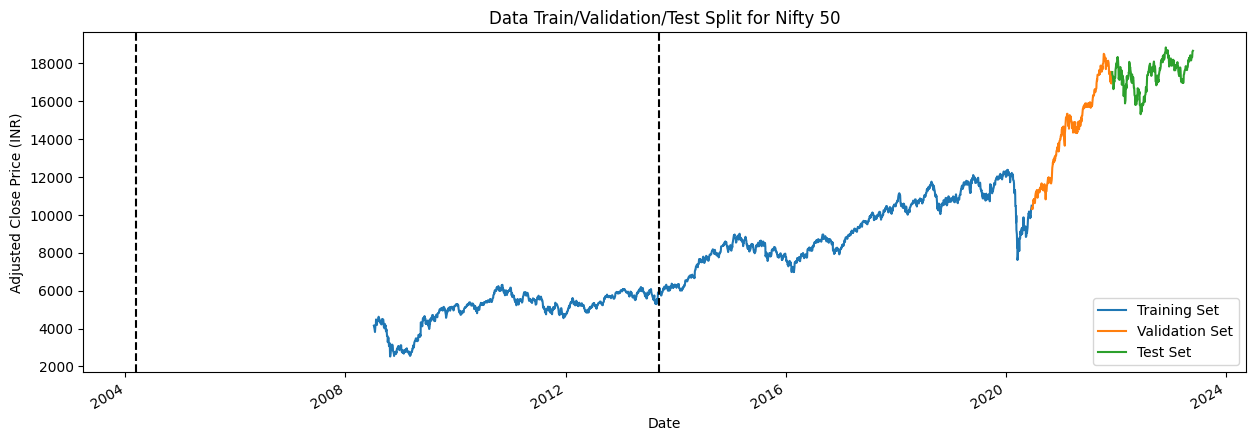

In [ ]:
train_len = math.ceil(len(nifty50_df)*0.8)
val_len = math.ceil(len(nifty50_df)*0.9)

nifty50_train_graph = nifty50_df[:train_len]
nifty50_val_graph = nifty50_df[train_len:val_len]
nifty50_test_graph = nifty50_df[val_len:]

fig, ax = plt.subplots(figsize=(15, 5))
nifty50_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for Nifty 50')
nifty50_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
nifty50_test_graph["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
ax.axvline('2004-03-12', color='black', ls='--')
ax.axvline('2013-09-11', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set', 'Test Set'])
plt.show()

Here is the train-val-test split for the Bank Nifty.

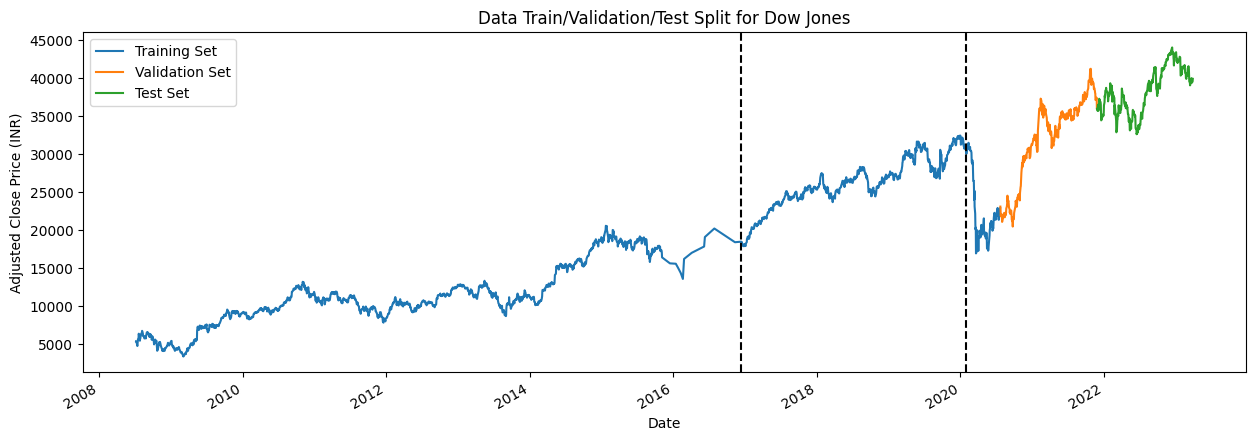

In [ ]:
train_len = math.ceil(len(banknifty_df)*0.8)
val_len = math.ceil(len(banknifty_df)*0.9)

banknifty_train_graph = banknifty_df[:train_len]
banknifty_val_graph = banknifty_df[train_len:val_len]
banknifty_test_graph = banknifty_df[val_len:]

fig, ax = plt.subplots(figsize=(15, 5))
banknifty_train_graph["adjclose"].plot(ax=ax, label='Training Set', title='Data Train/Validation/Test Split for Dow Jones')
banknifty_val_graph["adjclose"].plot(ax=ax, label='Validation Set')
banknifty_test_graph["adjclose"].plot(ax=ax, label='Test Set')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (INR)")
ax.axvline('2016-12-12', color='black', ls='--')
ax.axvline('2020-01-29', color='black', ls='--')
ax.legend(['Training Set', 'Validation Set','Test Set'])
plt.show()

### Preparing the data for modeling: scaling

We're ready to scale our data. We'll scale each data set individually for ease later on. We're only going to scale the inputs and leave the outputs as they are.

In [ ]:
scaler = StandardScaler().fit(X_nifty50_xgboost)
scaled_xgboost = scaler.transform(X_nifty50_xgboost)
X_nifty50_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nifty50_xgboost.columns)

In [ ]:
scaler = StandardScaler().fit(X_nifty50_xgboost)
scaled_xgboost = scaler.fit_transform(X_val_nifty50_xgboost)
X_val_nifty50_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nifty50_xgboost.columns)

In [ ]:
scaler = StandardScaler().fit(X_nifty50_xgboost)
scaled_xgboost = scaler.fit_transform(X_test_nifty50_xgboost)
X_test_nifty50_xgboost = pd.DataFrame(scaled_xgboost, columns=X_nifty50_xgboost.columns)

In [ ]:
scaler = StandardScaler().fit(X_banknifty_xgboost)
scaled_xgboost = scaler.transform(X_banknifty_xgboost)
X_banknifty_xgboost = pd.DataFrame(scaled_xgboost, columns=X_banknifty_xgboost.columns)

In [ ]:
scaler = StandardScaler().fit(X_banknifty_xgboost)
scaled_xgboost = scaler.fit_transform(X_val_banknifty_xgboost)
X_val_banknifty_xgboost = pd.DataFrame(scaled_xgboost, columns=X_banknifty_xgboost.columns)

In [ ]:
scaler = StandardScaler().fit(X_banknifty_xgboost)
scaled_xgboost = scaler.fit_transform(X_test_banknifty_xgboost)
X_test_banknifty_xgboost = pd.DataFrame(scaled_xgboost, columns=X_banknifty_xgboost.columns)

### Modeling: XGBoost

We'll start by defining our model, xgboost.

In [ ]:
xgboost = XGBRegressor(random_state=42)

We'll now create a baseline XGBoost model function that can create, fit, and predict the train and test values for our stock indexes. 

In [ ]:
def xgboost_model(train_df, train_targets, val_df, val_targets, test_df, test_targets):
    model = xgboost.fit(train_df, train_targets)

    train_preds = model.predict(train_df)
    train_rmse = rmse(train_preds, train_targets)

    val_preds = model.predict(val_df)
    val_rmse = rmse(val_preds, val_targets)

    test_preds = model.predict(test_df)
    test_rmse = rmse(test_preds, test_targets)

    return train_preds, train_rmse, val_preds, val_rmse, test_preds, test_rmse

#### Predicting the Nifty 50

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets. 

In [ ]:
nifty50_xgboost_preds, nifty50_xgboost_rmse, val_nifty50_xgboost_preds, nifty50_xgboost_val_rmse, test_nifty50_xgboost_preds, nifty50_xgboost_test_rmse = xgboost_model(X_nifty50_xgboost, Y_nifty50_xgboost, X_val_nifty50_xgboost, Y_val_nifty50_xgboost, X_test_nifty50_xgboost, Y_test_nifty50_xgboost)
print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(nifty50_xgboost_rmse, nifty50_xgboost_val_rmse, nifty50_xgboost_test_rmse))

XGBoost train RSME:26.002718325472333, XGBoost validation RSME:6793.604487882591, XGBoost test RMSE:9936.401520165135


In [ ]:
nifty50_linear_test_rmse 

9782.540163453243

Now we're going to tune hyperparameters in order to improve our model.

I have done testing and determined the best hyperparameters for each xgboost model for each stock index. Each model was fit to the training data, followed by testing parameters on the validation data. I will not show you all the tests, but rather, the best models. 

Here is the function used to test hyperparameters:

In [ ]:
def test_params(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('XGBoost Train RMSE: {}, XGBoost Validation RMSE: {}'.format(train_rmse, val_rmse))

Here is the best model for the Nifty 50

In [ ]:
nifty50_xgboost_model = test_params(X_nifty50_xgboost, Y_nifty50_xgboost, X_val_nifty50_xgboost, Y_val_nifty50_xgboost,
                                  colsample_bytree=0.97, max_delta_step=380, min_child_weight=1, gamma=5, n_jobs=-1, 
                                  learning_rate=0.1, n_estimators=300, max_depth=4)

XGBoost Train RMSE: 142.32367074798245, XGBoost Validation RMSE: 6817.460858705365


Now we'll use this model to calculate our test predictions and RMSE. 

In [ ]:
xgboost_nifty50_model = XGBRegressor(random_state=42, colsample_bytree=0.97, max_delta_step=380, min_child_weight=1, gamma=5, n_jobs=-1, 
                                  learning_rate=0.1, n_estimators=300, max_depth=4)

xgboost_nifty50_model.fit(X_nifty50_xgboost, Y_nifty50_xgboost)

xgboost_nifty50_test_preds = xgboost_nifty50_model.predict(X_test_nifty50_xgboost)
xgboost_nifty50_test_rmse = rmse(xgboost_nifty50_test_preds, Y_test_nifty50_xgboost)

In [ ]:
print("XGBoost Test RMSE: {}".format(xgboost_nifty50_test_rmse))

XGBoost Test RMSE: 10067.596447116819


Much to my surprise, the XGBoost model with hyperparameters is not an improvement from the linear model. 

Now we'll plot the predictions for the test set versus the actual values.

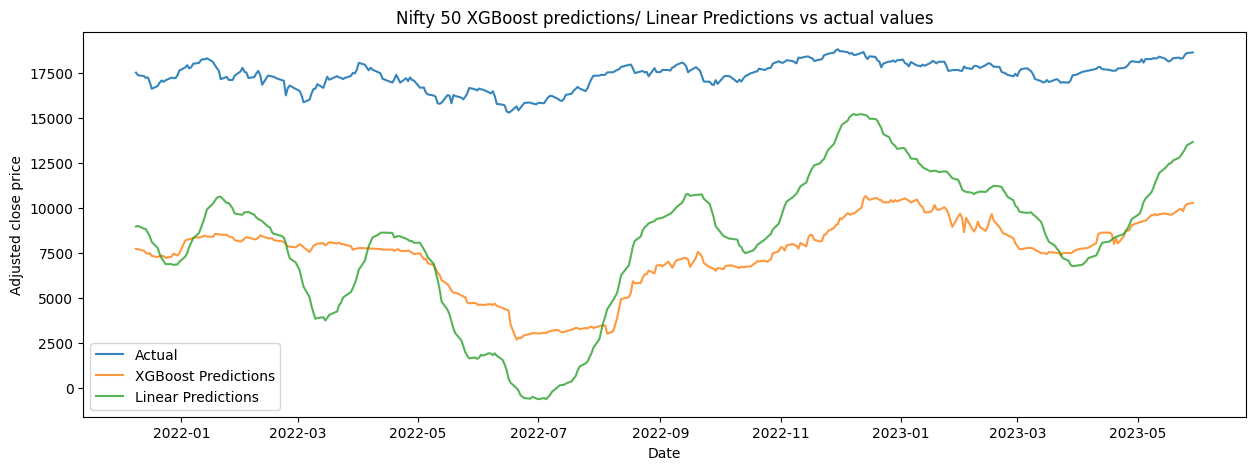

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train_len = math.ceil(len(nifty50_df)*0.9)

targets = nifty50_df[train_len:].adjclose
predictions = xgboost_nifty50_test_preds
lin_predictions = test_nifty50_linear_preds
    
plt.plot(nifty50_df[train_len:].index, targets, alpha=0.9);
plt.plot(nifty50_df[train_len:].index, predictions,alpha=0.8);
plt.plot(nifty50_df[train_len:].index, lin_predictions,alpha=0.8);
plt.title('Nifty 50 XGBoost predictions/ Linear Predictions vs actual values')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predictions']);

#### Predicting the Bank Nifty

We'll start by fitting our baseline model and calculating the predictions, followed by RMSE for the train, validate, and test sets. 

In [ ]:
banknifty_xgboost_preds, banknifty_xgboost_rmse, val_banknifty_xgboost_preds, banknifty_xgboost_val_rmse, test_banknifty_xgboost_preds, banknifty_xgboost_test_rmse = xgboost_model(X_banknifty_xgboost, Y_banknifty_xgboost, X_val_banknifty_xgboost, Y_val_banknifty_xgboost, X_test_banknifty_xgboost, Y_test_banknifty_xgboost)
print("XGBoost train RSME:{}, XGBoost validation RSME:{}, XGBoost test RMSE:{}".format(banknifty_xgboost_rmse, banknifty_xgboost_val_rmse, banknifty_xgboost_test_rmse))

XGBoost train RSME:70.04425848758909, XGBoost validation RSME:16226.063099766985, XGBoost test RMSE:22797.097918064395


In [ ]:
banknifty_linear_test_rmse 

21827.488837569108

Now we're going to tune hyperparameters in order to improve our model.

Here is the best model for the Bank Nifty:

In [ ]:
banknifty_xgboost_model = test_params(X_banknifty_xgboost, Y_banknifty_xgboost, X_val_banknifty_xgboost, Y_val_banknifty_xgboost,
                                 n_jobs=-1, n_estimators=70, min_child_weight=10,
                                 colsample_bytree=0.01)

XGBoost Train RMSE: 531.3003626340951, XGBoost Validation RMSE: 16499.321827134943


Now we'll use this model to calculate our test predictions and RMSE. 

In [ ]:
xgboost_banknifty_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=70, min_child_weight=10,colsample_bytree=0.01)

xgboost_banknifty_model.fit(X_banknifty_xgboost, Y_banknifty_xgboost)

xgboost_banknifty_test_preds = xgboost_banknifty_model.predict(X_test_banknifty_xgboost)
xgboost_banknifty_test_rmse = rmse(xgboost_banknifty_test_preds, Y_test_banknifty_xgboost)

In [ ]:
print("XGBoost Test RMSE: {}".format(xgboost_banknifty_test_rmse))

XGBoost Test RMSE: 22418.53849999599


Much to my surprise, the XGBoost model with hyperparameters is not an improvement from the linear model. 

Now we'll plot the predictions for the test set versus the actual values.

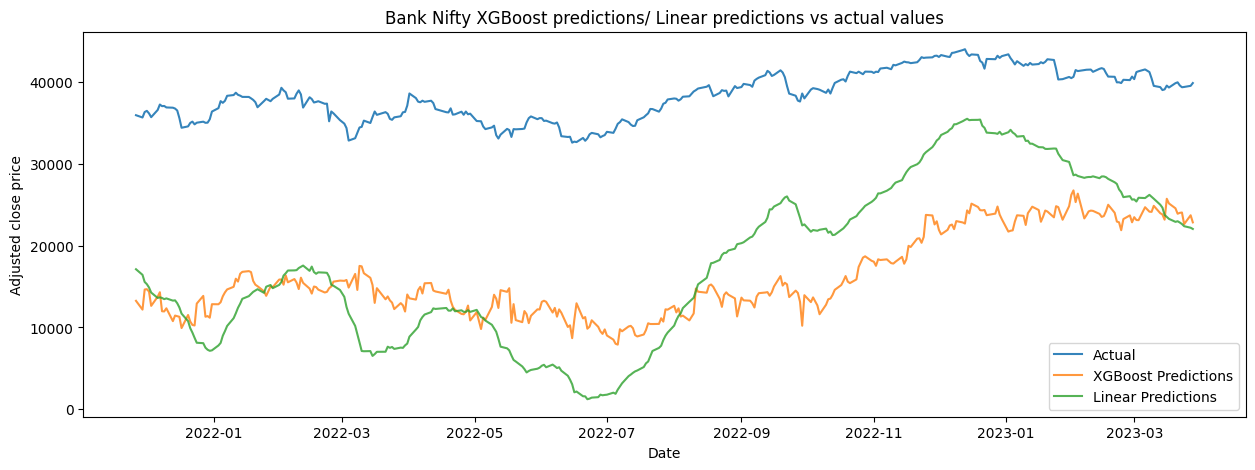

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
train_len = math.ceil(len(banknifty_df)*0.9)

targets = banknifty_df[train_len:].adjclose
predictions = xgboost_banknifty_test_preds
lin_predictions = test_banknifty_linear_preds
    
plt.plot(banknifty_df[train_len:].index, targets, alpha=0.9);
plt.plot(banknifty_df[train_len:].index, predictions,alpha=0.8);
plt.plot(banknifty_df[train_len:].index, lin_predictions,alpha=0.8);  
plt.title('Bank Nifty XGBoost predictions/ Linear predictions vs actual values')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'XGBoost Predictions', 'Linear Predictions']);

Although there is a huge difference in values, the shape of the predictions is quite indicative of the actual values.

### Closing thoughts about XGBoost Regression modeling

Our linear models have outperformed XGBoost for 2 data sets. I find this really surprising as I assumed that XGBoost would outperform Linear Regression with flying colours. It also goes to show that because each stock index has a different history of prices, the models interact with the data sets in very different ways. It's an important reminder that every stock index is unique and should not be treated the same when it comes to predictive modeling.

Let's see if LSTM is a better model than Linear Regression.

## LSTM 

Now we're ready to try our final model type, Long Short Term Memory, or LSTM.

LSTM is a recurrent neural network model, RNN. It is commonly used to predict future stock prices so I can't wait to see how it compares to Linear Regression and XGBoost. 

I have not previously worked with RNN models so I will be learning about how to use the model as the project goes on. I will try and explain each step thoroughly in the event that you also have not worked with RNNs. 

We'll start by importing a few libraries.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense
from keras.models import Sequential

LSTM models only require the target column to make predictions. So the inputs and targets are created from just the column, adjclose.

We'll start out by defining sets of our data that only contain the target column, adjclose. 

In [ ]:
nifty50_LSTM = nifty50_df[["adjclose"]]
banknifty_LSTM = banknifty_df[["adjclose"]]

### Preparing the data for modeling: scaling

Now we can scale our data sets. We'll use the StandardScaler().

In [ ]:
scaler = StandardScaler().fit(nifty50_LSTM)
transform_df = scaler.fit_transform(nifty50_LSTM)
nifty50_LSTM_scaled = pd.DataFrame(transform_df, columns=nifty50_LSTM.columns)

In [ ]:
scaler = StandardScaler().fit(banknifty_LSTM)
transform_df = scaler.fit_transform(banknifty_LSTM)
banknifty_LSTM_scaled = pd.DataFrame(transform_df, columns=banknifty_LSTM.columns)

### Preparing the data for modeling: train-test splits

Now we're going to break up the scaled data into train and test sets. We don't need a validation set because we won't be tuning any hyperparameters for this model.

In [ ]:
train_len = math.ceil(len(nifty50_LSTM_scaled)*0.9)

X_nifty50_LSTM_df = nifty50_LSTM_scaled[:train_len].values.reshape(-1,1)

X_test_nifty50_LSTM_df = nifty50_LSTM_scaled[train_len:].values.reshape(-1,1)

In [ ]:
train_len = math.ceil(len(banknifty_LSTM_scaled)*0.9)

X_banknifty_LSTM_df = banknifty_LSTM_scaled[:train_len].values.reshape(-1,1)

X_test_banknifty_LSTM_df = banknifty_LSTM_scaled[train_len:].values.reshape(-1,1)

### Modeling: LSTM

#### Predicting the Nifty 50

Now that we have split the scaled data into train and test sets, we're going to further split both sets into input and target sets. The way that we will do this for the LSTM model is by letting our input set be a range of days, say 50 days of data, followed by letting our target set be the 51st day of data. This pattern will continue until all of the data has been accounted for.

What this splitting implies is that we will aim to predict the 51st day of a stock index price based on the previous 50 days of data. 

In [ ]:
X_nifty50_LSTM, Y_nifty50_LSTM = [], []
window = 50

for i in range(window, len(X_nifty50_LSTM_df)):
  X_nifty50_LSTM.append(X_nifty50_LSTM_df[i-window:i, 0])
  Y_nifty50_LSTM.append(X_nifty50_LSTM_df[i, 0])

We'll also turn our input and target sets into numpy arrays, followed by reshaping the input set to be the size: (length of the input set, window = 50 days, 1 = 1 feature, namely the adjusted close price). This 3D array can be passed into the LSTM model down the track.

In [ ]:
X_nifty50_LSTM = np.array(X_nifty50_LSTM)
Y_nifty50_LSTM = np.array(Y_nifty50_LSTM)

X_nifty50_LSTM = np.reshape(X_nifty50_LSTM, (len(X_nifty50_LSTM), 50, 1))

Now we'll repeat the process for the test set.

In [ ]:
X_test_nifty50_LSTM, Y_test_nifty50_LSTM = [], []
window = 50

for i in range(window, len(X_test_nifty50_LSTM_df)):
  X_test_nifty50_LSTM.append(X_test_nifty50_LSTM_df[i-window:i, 0])
  Y_test_nifty50_LSTM.append(X_test_nifty50_LSTM_df[i, 0])

In [ ]:
X_test_nifty50_LSTM = np.array(X_test_nifty50_LSTM)
Y_test_nifty50_LSTM = np.array(Y_test_nifty50_LSTM)

X_test_nifty50_LSTM = np.reshape(X_test_nifty50_LSTM, (len(X_test_nifty50_LSTM), 50, 1))

Now it's time to create and fit our LSTM model.

In [ ]:
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(30))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

Now we're ready to fit our model. I will only use 4 epochs due to processing power. This would ideally be 50+.

In [ ]:
model.fit(X_nifty50_LSTM, Y_nifty50_LSTM, batch_size=1 , epochs=4)

Epoch 1/4
3232/3232 [==============================] - 114s 34ms/step - loss: 0.0064
Epoch 2/4
3232/3232 [==============================] - 110s 34ms/step - loss: 0.0026
Epoch 3/4
3232/3232 [==============================] - 117s 36ms/step - loss: 0.0017
Epoch 4/4
3232/3232 [==============================] - 107s 33ms/step - loss: 0.0012


Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [ ]:
nifty50_LSTM_test_preds = model.predict(X_test_nifty50_LSTM)
nifty50_LSTM_test_RMSE = rmse(nifty50_LSTM_test_preds, Y_test_nifty50_LSTM)
nifty50_LSTM_test_RMSE

10/10 [==============================] - 2s 24ms/step


0.04843243344148936

Our test RMSE is incredibly low compared to our other models. We don't even need to compare to the Linear Regression or XGBoost models as this value is so low. Let's visualise the predictions.

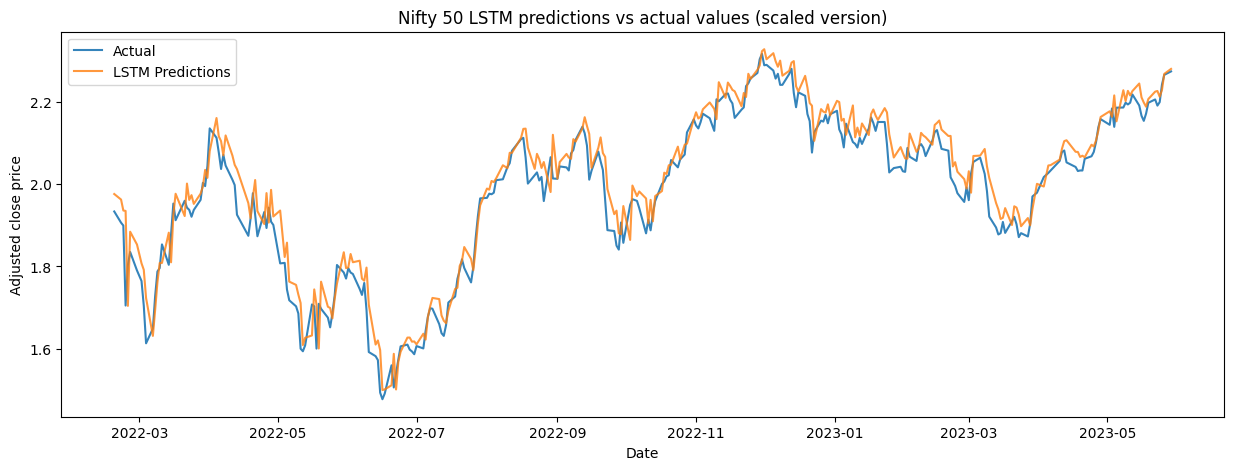

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
test_len = math.ceil(len(nifty50_df)*0.9) + 50

targets = Y_test_nifty50_LSTM
predictions = nifty50_LSTM_test_preds
    
plt.plot(nifty50_df[test_len:].index, targets, alpha=0.9);
plt.plot(nifty50_df[test_len:].index, predictions,alpha=0.8);

plt.title('Nifty 50 LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);

#### Predicting the Bank Nifty

The following code is an exact replica of what was just done for the Nifty 50. For that reason I will not annotate this section and would recommend jumping to the end unless you'd like to view the RMSE for the LSTM model on the Dow Jones data.

In [ ]:
X_banknifty_LSTM, Y_banknifty_LSTM = [], []
window = 50

for i in range(window, len(X_banknifty_LSTM_df)):
  X_banknifty_LSTM.append(X_banknifty_LSTM_df[i-window:i, 0])
  Y_banknifty_LSTM.append(X_banknifty_LSTM_df[i, 0])

In [ ]:
X_banknifty_LSTM = np.array(X_banknifty_LSTM)
Y_banknifty_LSTM = np.array(Y_banknifty_LSTM)

X_banknifty_LSTM = np.reshape(X_banknifty_LSTM, (len(X_banknifty_LSTM), 50, 1))

In [ ]:
X_test_banknifty_LSTM, Y_test_banknifty_LSTM = [], []
window = 50

for i in range(window, len(X_test_banknifty_LSTM_df)):
  X_test_banknifty_LSTM.append(X_test_banknifty_LSTM_df[i-window:i, 0])
  Y_test_banknifty_LSTM.append(X_test_banknifty_LSTM_df[i, 0])

In [ ]:
X_test_banknifty_LSTM = np.array(X_test_banknifty_LSTM)
Y_test_banknifty_LSTM = np.array(Y_test_banknifty_LSTM)

X_test_banknifty_LSTM = np.reshape(X_test_banknifty_LSTM, (len(X_test_banknifty_LSTM), 50, 1))

In [ ]:
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(30))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_banknifty_LSTM, Y_banknifty_LSTM, batch_size=1 , epochs=4)

Epoch 1/4
2953/2953 [==============================] - 107s 35ms/step - loss: 0.0069
Epoch 2/4
2953/2953 [==============================] - 100s 34ms/step - loss: 0.0027
Epoch 3/4
2953/2953 [==============================] - 99s 33ms/step - loss: 0.0018
Epoch 4/4
2953/2953 [==============================] - 98s 33ms/step - loss: 0.0015


Finally we'll calculate the test predictions and the test RMSE to see how our model did.

In [ ]:
banknifty_LSTM_test_preds = model.predict(X_test_banknifty_LSTM)
banknifty_LSTM_test_RMSE = rmse(banknifty_LSTM_test_preds, Y_test_banknifty_LSTM)
banknifty_LSTM_test_RMSE 

9/9 [==============================] - 1s 16ms/step


0.07335302170123839

Again, an incredible result! 

Let's visualise the results.

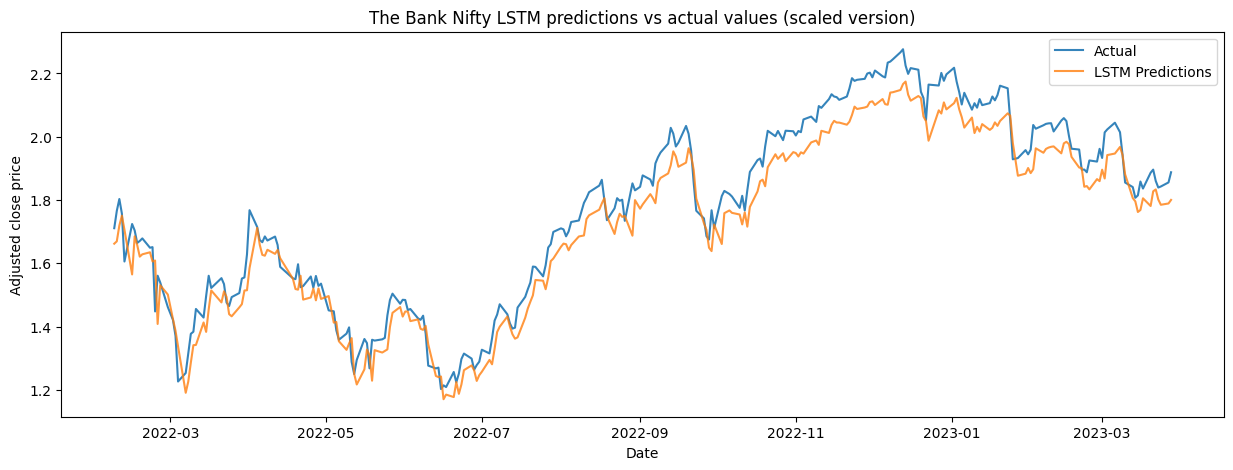

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
test_len = math.ceil(len(banknifty_df)*0.9) + 50

targets = Y_test_banknifty_LSTM
predictions = banknifty_LSTM_test_preds
    
plt.plot(banknifty_df[test_len:].index, targets, alpha=0.9);
plt.plot(banknifty_df[test_len:].index, predictions,alpha=0.8);

plt.title('The Bank Nifty LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);

This model is so incredibly accurate. I'm blown away by the power of LSTM.

### Closing thoughts about LSTM modeling

It was so interesting and exciting to work with a RNN model for the first time. Although the learning curve was steep, I enjoyed each step of the way immensely. 

The LSTM model does such an incredible job predicting future stock prices I'm just in awe. The results of LSTM and the Linear and XGBoost Regression models are incomparable.

I'm excited to continue learning about LSTM models and understand more about how they can be used to predict future stock prices. 

## Predicting future values

We're now going to put one of our models to the test. We'll use the Bank Nifty model in order to predict tomorrows price. 

In order to do this we'll create a data frame of 51 prior days of just the adj price column. We'll then adjust the price column forward by a day and drop the 1st row (to mimic what we've done throughout the project). 

We'll then use model.predict in order to predict what the price will be for the 51st day.

We'll start by importing the data.

In [ ]:
banknifty_future_df = yf.download('^NSEBANK', start="2023-01-18", end="2023-04-03")
banknifty_future_df = banknifty_future_df.rename({'Adj Close': 'adjclose', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, axis=1)

banknifty_future_df = adj_close_shift(banknifty_future_df)

banknifty_futur_adjclose_df = banknifty_future_df["adjclose"]

future_df = pd.DataFrame(banknifty_futur_adjclose_df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
future_df

,adjclose
Date,
2023-01-18,42328.851562
2023-01-19,42506.800781
2023-01-20,42821.250000
2023-01-23,42733.449219
2023-01-24,41647.648438
2023-01-25,40345.300781
2023-01-27,40387.449219
2023-01-30,40655.050781
2023-01-31,40513.000000


In [ ]:
scaler = StandardScaler().fit(banknifty_LSTM)
transform_df = scaler.fit_transform(future_df)
future_scaled = pd.DataFrame(transform_df, columns=banknifty_LSTM.columns)

In [ ]:
future_scaled.head(10)

,adjclose
0,1.686531
1,1.871154
2,2.197396
3,2.106302
4,0.979780
5,-0.371411
6,-0.327681
7,-0.050044
8,-0.197422
9,-0.035259


In [ ]:
future_preds = model.predict(future_scaled)
future_preds

2/2 [==============================] - 1s 10ms/step


array([[ 1.4352196 ],
       [ 1.5345318 ],
       [ 1.687035  ],
       [ 1.647171  ],
       [ 0.94760275],
       [-0.39637142],
       [-0.3539523 ],
       [-0.07058666],
       [-0.22364376],
       [-0.05499708],
       [ 0.81622267],
       [ 0.69790655],
       [ 0.80815756],
       [ 0.85082304],
       [ 0.86581016],
       [ 0.8703743 ],
       [ 0.60637575],
       [ 0.9482045 ],
       [ 1.0174872 ],
       [ 0.93359554],
       [ 0.45085052],
       [-0.01944066],
       [-0.05028568],
       [-0.7167946 ],
       [-0.7120858 ],
       [-0.78686637],
       [-0.4341755 ],
       [-0.47119853],
       [-0.02334439],
       [-0.35156456],
       [ 0.5751161 ],
       [ 0.67422   ],
       [ 0.886137  ],
       [ 0.5806115 ],
       [-0.2527013 ],
       [-1.0301912 ],
       [-1.1213552 ],
       [-1.3003777 ],
       [-1.2639232 ],
       [-1.0090066 ],
       [-1.148734  ],
       [-0.7984037 ],
       [-0.71417034],
       [-0.9968691 ],
       [-1.1303449 ],
       [-1

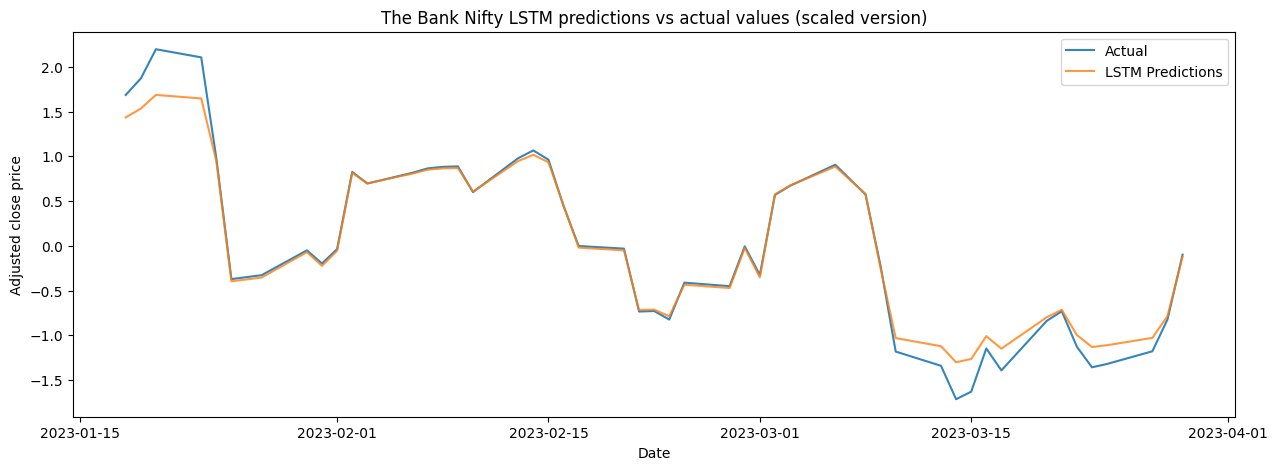

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

targets = future_scaled
predictions = future_preds
    
plt.plot(future_df.index, targets, alpha=0.9);
plt.plot(future_df.index, predictions,alpha=0.8);

plt.title('The Bank Nifty LSTM predictions vs actual values (scaled version)')
plt.xlabel('Date');
plt.ylabel('Adjusted close price')
plt.legend(['Actual', 'LSTM Predictions']);

## Conclusions and project summary

In this project, we applied 3 different machine learning models, Linear Regression, XGBoost Regression, and LSTM to 2 different stock index data sets. The goal was to predict future stock prices, specifically the adjusted close price for the next day.

I think that we were mildly successful in these predictions. The simplest model, Linear Regression, may have been off in terms of the values, but the shape of the data was nearly replicated.

The XGBoost model did a far worse job than I anticipated, worse than the Linear Regression model. When a model takes more CPU to run and is worse off, that's when you know it's not the model to be used. I would be interested in having another go with the XGBoost model to see if scaling the targets and/or using a different scaling technique would have a postive impact on the model performance.

The LSTM model is a highly used model in the stock analysis world and we can see why! With incredibly low RSME scores and in the visualisations it's clear that this model did an incredible job of predicting future stock values. It's important to note that the method of using 50 days of previous data to predict the 52nd day is an advantage compared to the other models. 

All in all, I was really interested in seeing how well we could predict future stock prices. It is as difficult as I expected. I would change a few elements of this project that I will discuss more in the next section, Future Work.

## Future work

I have so many ideas about future work and iterations for this project, I actually can't wait to get back into it!

#### 1. Plot the non-scaled versions of the LSTM model predictions versus actual values

This is something I spent many days trying to sort out. I've come very close many times to plotting these graphs, but never got it exactly right. For the sake of moving on to other tasks and projects, I'm letting this go for now but will be following up with many Youtube videos and books to figure out exactly how to approach this. 

#### 2. Amount of data used

The first thing I would do differently would be to shorten the time span used. For the purpose of this project, I needed to work with 50,000+ rows of data. I should have considered this when choosing a project subject, but alas, I gave it a red hot go. By shortening the time span covered, I believe the models would be much more accurate. 

For the most part, these 4 stock indexes have changed in price drastically since their creation. If we were to only look at the S&P500 for the last 5 years, our models would have a much greater understanding of current prices.

This would also impact the data seen in the test, validation, train sets and again I think this would be a positive change for our models capabilities.

#### 3. Incorporate sentiment analysis

I think what makes predicting future stock index prices so difficult is that  the stock market is controlled by human beings - we are responsible for the ups and downs of prices based on selling and buying stocks. Due to this correlation, our data would benefit from having some form of daily sentiment analysis.

My first thought would be to pull financial/ world news headlines from each day and perform a sentiment analysis on them to determine if the mood of the day is good or bad. I think that we would be able to see a relationship between price fluctuations and daily sentiment and therefore, our models would be improved.

#### 4. Engineer more investment specific features from existing features

I think it would be interesting to look at the investment specific features such as MACD and RSI in more detail, followed by derviving more features from them. For instance, the relationship between the MACD features can indicate good and bad times to buy/ sell stocks. It would be interesting to create a categorical, Y/N column that indicates whether it's a good or bad time. I think this would further improve the models capabilities.

#### 5. Incorporate more investment specific features

I think it would be interesting and perhaps beneficial to study further investment specific features and engineer them to be in the data set. 

#### 6. Study the way that the stock indexes are developed and how that might impact our model choice

Each stock index follows a set of stocks based on a certain measurement. For instance, the S&P500 is a free-float weighted/capitalization-weighted index. I'm curious if the way a stock index is composed would lead us to choose a specific type of model. 

These are just a few of the ideas I have for future iterations of this project. I'm keen to use this project as a springboard for further stock price analysis in the future.



## Sources

* Killian, Anzél. “10 Trading Indicators Every Trader Should Know.” IG, https://www.ig.com/au/trading-strategies/10-trading-indicators-every-trader-should-know-190604
* Mitchell, Cory. “Trend Trading: The 4 Most Common Indicators.” Investopedia, Investopedia, 8 July 2022, https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp
* Mtszkw. “XGBoost for Stock Trend & Prices Prediction.” Kaggle, 30 Nov. 2020, https://www.kaggle.com/code/mtszkw/xgboost-for-stock-trend-prices-prediction 
* Potters, Charles. “7 Technical Indicators to Build a Trading Toolkit.”  Investopedia, Investopedia, 1 Apr. 2023, https://www.investopedia.com/top-7-technical-analysis-tools-4773275
* West, Zαck. “Calculating the MACD in Python for Algorithmic Trading.” Αlphαrithms, 16 June 2022, https://www.alpharithms.com/calculate-macd-python-272222/
* West, Zαck. “Calculating the RSI in Python: 3 Ways to Predict Market Status &Price Movement.” Αlphαrithms, 16 June 2022, https://www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
* West, Zαck. “Predicting Stock Prices with Linear Regression in Python.” Αlphαrithms, 19 June 2022, https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/  